In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv('Device Event Detail 101 Cypress.csv')

In [4]:
df

,Timestamp,Category,Type,Event Value,
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,


In [8]:
type(df['Timestamp'][0])

str

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [12]:
df

,Timestamp,Category,Type,Event Value,
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2,
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2,
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,


In [13]:
df['Timestamp'][0]

Timestamp('2023-01-04 17:56:10.900000')

In [21]:
df = df.loc[df['Timestamp']>='2023-01-04 17:51:00'].reset_index(drop=True)

In [22]:
df

,Timestamp,Category,Type,Event Value,
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
1095,2023-01-04 17:51:01.800,Detector Events,Detector On,14,
1096,2023-01-04 17:51:01.400,Detector Events,Detector Off,12,
1097,2023-01-04 17:51:01.300,Detector Events,Detector Off,14,
1098,2023-01-04 17:51:01.100,Detector Events,Detector Off,24,


In [27]:
np.unique(df[' Category'])

array([' Comunication and Time Drift Events', ' Detector Events',
       ' Ramp Meter Events'], dtype=object)

In [30]:
np.unique(df[' Type'])

array([' Average Response Time (ms)', ' Detector Off', ' Detector On',
       ' Failed Comm Attempts', ' Percent Comm Loss',
       ' Ramp Meter - Begin Green', ' Ramp Meter - Begin Red',
       ' Ramp Meter - Lane 1 Active Rate',
       ' Ramp Meter - Lane 1 Base Rate',
       ' Ramp Meter - Lane Red Light Violation',
       ' Ramp Meter - Mainline Avg. Flow Rate',
       ' Ramp Meter - Mainline Avg. Occ.',
       ' Ramp Meter - Mainline Avg. Speed', ' Time Drift (sec)',
       ' Total Comm Attempts'], dtype=object)

In [29]:
df.columns

Index(['Timestamp', ' Category', ' Type', ' Event Value', ' '], dtype='object')

In [35]:
df_green_time_estimation = df.loc[(df[' Type']==' Ramp Meter - Begin Green') | (df[' Type']==' Ramp Meter - Begin Red')].reset_index(drop=True)

In [36]:
df_green_time_estimation

,Timestamp,Category,Type,Event Value,
0,2023-01-04 17:55:26.900,Ramp Meter Events,Ramp Meter - Begin Red,1,
1,2023-01-04 17:55:24.800,Ramp Meter Events,Ramp Meter - Begin Green,1,
2,2023-01-04 17:55:01.500,Ramp Meter Events,Ramp Meter - Begin Red,1,
3,2023-01-04 17:54:59.400,Ramp Meter Events,Ramp Meter - Begin Green,1,
4,2023-01-04 17:54:52.100,Ramp Meter Events,Ramp Meter - Begin Red,1,
5,2023-01-04 17:54:50.000,Ramp Meter Events,Ramp Meter - Begin Green,1,
6,2023-01-04 17:54:36.000,Ramp Meter Events,Ramp Meter - Begin Red,1,
7,2023-01-04 17:54:34.900,Ramp Meter Events,Ramp Meter - Begin Green,1,
8,2023-01-04 17:53:45.000,Ramp Meter Events,Ramp Meter - Begin Red,1,
9,2023-01-04 17:53:43.900,Ramp Meter Events,Ramp Meter - Begin Green,1,


In [58]:
df_green_time_estimation = df_green_time_estimation.loc[df_green_time_estimation[' Type'].shift()!=df_green_time_estimation[' Type']]

In [60]:
df_green_time_estimation = df_green_time_estimation.reset_index(drop=True)

In [57]:
np.unique(df_green_time_estimation[' Type'])

array([' Ramp Meter - Begin Green', ' Ramp Meter - Begin Red'],
      dtype=object)

In [49]:
df_green_time_estimation.to_csv('Green time estimation.csv')

In [41]:
(df_green_time_estimation['Timestamp'][0]-df_green_time_estimation['Timestamp'][1]).total_seconds()

2.1

In [42]:
df

,Timestamp,Category,Type,Event Value,
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
1095,2023-01-04 17:51:01.800,Detector Events,Detector On,14,
1096,2023-01-04 17:51:01.400,Detector Events,Detector Off,12,
1097,2023-01-04 17:51:01.300,Detector Events,Detector Off,14,
1098,2023-01-04 17:51:01.100,Detector Events,Detector Off,24,


In [43]:
df.to_csv('Events five minute interval 101 Cyrpress SB.csv')

In [46]:
df_type_no_dup = df.drop_duplicates(' Type').reset_index(drop=True)

In [48]:
df_type_no_dup.to_csv('Unique Events five minute interval 101 Cyrpress SB.csv')

In [54]:
(df_green_time_estimation['Timestamp'][0]-df_green_time_estimation['Timestamp'][1]).total_seconds()

2.1

In [63]:
total_green_time = 0
start_time = 0
end_time = 0
for i in range(len(df_green_time_estimation)):
    if df_green_time_estimation[' Type'][i] == ' Ramp Meter - Begin Red':
        start_time = df_green_time_estimation['Timestamp'][i]
    else:
        if start_time != 0:
            end_time = df_green_time_estimation['Timestamp'][i]
            total_green_time += (start_time - end_time).total_seconds()
            print(total_green_time)
print(total_green_time)

2.1
4.2
6.300000000000001
7.4
8.5
10.6
12.7
44.8
46.9
49.0
51.1
53.2
55.300000000000004
55.300000000000004


In [56]:
len(df)

1100

# Green Time Estimation

In [67]:
total_green_time = 0
start_time = 0
end_time = 0
for i in range(len(df_green_time_estimation)):
    if df_green_time_estimation[' Type'][i] == ' Ramp Meter - Begin Green':
        start_time = df_green_time_estimation['Timestamp'][i]
        print('hi')
    else:
        if start_time != 0:
            end_time = df_green_time_estimation['Timestamp'][i]
            total_green_time += (start_time - end_time).total_seconds()
            print(total_green_time)
print(total_green_time)

hi
23.3
hi
30.6
hi
44.6
hi
94.5
hi
102.8
hi
110.1
hi
119.5
hi
138.6
hi
149.7
hi
164.0
hi
173.9
hi
207.10000000000002
hi
207.10000000000002


In [68]:
207.1+55.3

262.4

In [69]:
df_green_time_estimation

,Timestamp,Category,Type,Event Value,
0,2023-01-04 17:55:26.900,Ramp Meter Events,Ramp Meter - Begin Red,1,
1,2023-01-04 17:55:24.800,Ramp Meter Events,Ramp Meter - Begin Green,1,
2,2023-01-04 17:55:01.500,Ramp Meter Events,Ramp Meter - Begin Red,1,
3,2023-01-04 17:54:59.400,Ramp Meter Events,Ramp Meter - Begin Green,1,
4,2023-01-04 17:54:52.100,Ramp Meter Events,Ramp Meter - Begin Red,1,
5,2023-01-04 17:54:50.000,Ramp Meter Events,Ramp Meter - Begin Green,1,
6,2023-01-04 17:54:36.000,Ramp Meter Events,Ramp Meter - Begin Red,1,
7,2023-01-04 17:54:34.900,Ramp Meter Events,Ramp Meter - Begin Green,1,
8,2023-01-04 17:53:45.000,Ramp Meter Events,Ramp Meter - Begin Red,1,
9,2023-01-04 17:53:43.900,Ramp Meter Events,Ramp Meter - Begin Green,1,


In [70]:
(df_green_time_estimation['Timestamp'][0]-df_green_time_estimation['Timestamp'][25]).total_seconds()

262.4

# Synchronization

In [159]:
file_name = './2023-01-04 Cypress 101/Data/101 Cypress - Device Event Detail (raw data).xlsx'
xl_file = pd.ExcelFile(file_name)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}

In [160]:
df_event_detail = dfs['Data']

In [161]:
df_event_detail

,Timestamp,Category,Type,Event Value,
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,


In [48]:
df = pd.read_csv('Calibration.csv')

In [49]:
df

,Raw data timestamp,Video timestamp
0,01-04-2023 17:47:32.1,2:03:40
1,01-04-2023 17:37:23.5,1:53:30
2,01-04-2023 17:27:28.8,1:43:36
3,01-04-2023 17:15:29.8,1:31:36
4,01-04-2023 17:02:40.1,1:18:48
5,01-04-2023 16:47:20.1,1:03:28
6,01-04-2023 16:37:21.6,0:53:29
7,01-04-2023 16:26:19.1,0:42:27
8,01-04-2023 16:09:36.3,0:25:44
9,01-04-2023 15:55:02.6,0:11:09


In [21]:
df['Video timestamp'][1]

'1:53'

In [50]:
df['Raw data timestamp'] = pd.to_datetime(df['Raw data timestamp'])
df['Video timestamp'] = pd.to_datetime(df['Video timestamp'])

In [51]:
df

,Raw data timestamp,Video timestamp
0,2023-01-04 17:47:32.100,2023-01-19 02:03:40
1,2023-01-04 17:37:23.500,2023-01-19 01:53:30
2,2023-01-04 17:27:28.800,2023-01-19 01:43:36
3,2023-01-04 17:15:29.800,2023-01-19 01:31:36
4,2023-01-04 17:02:40.100,2023-01-19 01:18:48
5,2023-01-04 16:47:20.100,2023-01-19 01:03:28
6,2023-01-04 16:37:21.600,2023-01-19 00:53:29
7,2023-01-04 16:26:19.100,2023-01-19 00:42:27
8,2023-01-04 16:09:36.300,2023-01-19 00:25:44
9,2023-01-04 15:55:02.600,2023-01-19 00:11:09


In [52]:
raw_data_timestamp_array = [0]
for i in range(1,len(df)):
    raw_data_timestamp_array.append((df['Raw data timestamp'][0]-df['Raw data timestamp'][i]).total_seconds())
video_timestamp_array = [0]
for i in range(1,len(df)):
    video_timestamp_array.append((df['Video timestamp'][0]-df['Video timestamp'][i]).total_seconds())

In [53]:
raw_data_timestamp_array

[0, 608.6, 1203.3, 1922.3, 2692.0, 3612.0, 4210.5, 4873.0, 5875.8, 6749.5]

In [54]:
video_timestamp_array

[0, 610.0, 1204.0, 1924.0, 2692.0, 3612.0, 4211.0, 4873.0, 5876.0, 6751.0]

In [55]:
df['Raw time'] = raw_data_timestamp_array
df['Video time'] = video_timestamp_array

In [56]:
df

,Raw data timestamp,Video timestamp,Raw time,Video time
0,2023-01-04 17:47:32.100,2023-01-19 02:03:40,0.0,0.0
1,2023-01-04 17:37:23.500,2023-01-19 01:53:30,608.6,610.0
2,2023-01-04 17:27:28.800,2023-01-19 01:43:36,1203.3,1204.0
3,2023-01-04 17:15:29.800,2023-01-19 01:31:36,1922.3,1924.0
4,2023-01-04 17:02:40.100,2023-01-19 01:18:48,2692.0,2692.0
5,2023-01-04 16:47:20.100,2023-01-19 01:03:28,3612.0,3612.0
6,2023-01-04 16:37:21.600,2023-01-19 00:53:29,4210.5,4211.0
7,2023-01-04 16:26:19.100,2023-01-19 00:42:27,4873.0,4873.0
8,2023-01-04 16:09:36.300,2023-01-19 00:25:44,5875.8,5876.0
9,2023-01-04 15:55:02.600,2023-01-19 00:11:09,6749.5,6751.0


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
X,y = (np.array(df['Raw time']).reshape(-1,1),np.array(df['Video time']).reshape(-1,1))

In [60]:
lr.fit(X,y)


LinearRegression()

In [73]:
lr.predict(np.array([[6700]])).reshape(1,)[0]

6700.548433339999

In [44]:
X.reshape(-1,1).shape

(10, 1)

In [71]:
df['Video timestamp'][0]-datetime.timedelta(seconds=610)

Timestamp('2023-01-19 01:53:30')

In [75]:
#Predicting (interpolation)

In [77]:
df_event_detail

,Timestamp,Category,Type,Event Value,
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,
...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,


In [78]:
df_event_detail['Timestamp'] = pd.to_datetime(df_event_detail['Timestamp'])

In [80]:
raw_time_array = [0]
for i in range(1,len(df_event_detail)):
    raw_time_array.append((df_event_detail['Timestamp'][0]-df_event_detail['Timestamp'][i]).total_seconds())
pred_video_time_array = [0]
for i in range(1,len(df_event_detail)):
    pred_video_time_array.append(lr.predict(np.array([[raw_time_array[i]]])).reshape(1,)[0])

In [85]:
raw_time_array

[0,
 0.2,
 0.4,
 0.8,
 0.8,
 0.8,
 0.8,
 1.2,
 1.5,
 1.5,
 1.6,
 1.8,
 1.9,
 1.9,
 1.9,
 2.2,
 2.7,
 2.7,
 2.8,
 3.3,
 3.3,
 3.4,
 3.5,
 3.5,
 3.5,
 3.6,
 3.6,
 4.2,
 4.2,
 4.3,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.9,
 5.6,
 6.0,
 6.1,
 6.2,
 6.5,
 6.5,
 6.6,
 6.8,
 6.9,
 7.2,
 7.3,
 7.4,
 7.4,
 7.4,
 7.5,
 7.9,
 8.0,
 8.1,
 9.3,
 9.4,
 9.7,
 9.9,
 10.2,
 10.2,
 10.5,
 10.7,
 10.8,
 11.0,
 11.0,
 11.5,
 11.6,
 11.7,
 11.7,
 11.8,
 12.2,
 12.8,
 13.1,
 13.2,
 13.6,
 14.9,
 15.0,
 15.0,
 15.0,
 15.4,
 15.4,
 15.8,
 16.6,
 16.8,
 16.8,
 16.9,
 16.9,
 17.2,
 17.4,
 17.5,
 17.7,
 17.7,
 17.7,
 18.0,
 18.5,
 18.5,
 19.0,
 19.1,
 19.1,
 19.3,
 19.3,
 19.9,
 20.1,
 20.2,
 20.2,
 20.5,
 20.5,
 20.8,
 20.8,
 20.9,
 20.9,
 20.9,
 21.1,
 22.2,
 22.6,
 22.6,
 23.3,
 23.4,
 23.4,
 23.5,
 23.5,
 23.5,
 23.7,
 23.8,
 24.1,
 24.5,
 24.6,
 25.4,
 25.4,
 25.9,
 26.0,
 26.3,
 26.4,
 26.5,
 26.9,
 27.1,
 27.7,
 28.1,
 28.2,
 28.5,
 28.7,
 28.9,
 29.0,
 29.1,
 29.3,
 29.5,
 29.7,
 29.7,
 30.2,
 30.7,
 30.9,
 31

In [86]:
pred_video_time_array

[0,
 0.8464352997398992,
 1.0464323742209363,
 1.4464265231830102,
 1.4464265231830102,
 1.4464265231830102,
 1.4464265231830102,
 1.8464206721450842,
 2.14641628386664,
 2.14641628386664,
 2.2464148211071584,
 2.446411895588195,
 2.546410432828714,
 2.546410432828714,
 2.546410432828714,
 2.8464060445502697,
 3.346398730752862,
 3.346398730752862,
 3.4463972679933805,
 3.946389954195973,
 3.946389954195973,
 4.046388491436492,
 4.14638702867701,
 4.14638702867701,
 4.14638702867701,
 4.246385565917528,
 4.246385565917528,
 4.84637678936064,
 4.84637678936064,
 4.946375326601158,
 4.946375326601158,
 5.046373863841677,
 5.146372401082195,
 5.2463709383227135,
 5.3463694755632325,
 5.54636655004427,
 6.246356310727899,
 6.646350459689973,
 6.746348996930491,
 6.84634753417101,
 7.1463431458925655,
 7.1463431458925655,
 7.246341683133084,
 7.446338757614121,
 7.54633729485464,
 7.846332906576195,
 7.946331443816714,
 8.046329981057234,
 8.046329981057234,
 8.046329981057234,
 8.146328518

In [87]:
df_event_detail['Video time'] = pred_video_time_array

In [88]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,,0.000000
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,,0.846435
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,,1.046432
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427
...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2,,8162.927042
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2,,8163.527033
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026


In [94]:
#Index is 13097
df_event_detail['Timestamp'][13097]

Timestamp('2023-01-04 17:02:40.100000')

In [98]:
datetime.time('2023-01-19 01:18:48')

TypeError: an integer is required (got type str)

In [101]:
df['Video timestamp'][4]

Timestamp('2023-01-19 01:18:48')

In [103]:
video_timestamp_array = []
for i in range(13097):
    video_timestamp_array.append(df['Video timestamp'][4]+datetime.timedelta(seconds=df_event_detail['Video time'][13097]-df_event_detail['Video time'][i]))

In [104]:
video_timestamp_array

[Timestamp('2023-01-19 02:12:19.399472'),
 Timestamp('2023-01-19 02:12:18.553037'),
 Timestamp('2023-01-19 02:12:18.353040'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.553051'),
 Timestamp('2023-01-19 02:12:17.253056'),
 Timestamp('2023-01-19 02:12:17.253056'),
 Timestamp('2023-01-19 02:12:17.153057'),
 Timestamp('2023-01-19 02:12:16.953060'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.553066'),
 Timestamp('2023-01-19 02:12:16.053073'),
 Timestamp('2023-01-19 02:12:16.053073'),
 Timestamp('2023-01-19 02:12:15.953075'),
 Timestamp('2023-01-19 02:12:15.453082'),
 Timestamp('2023-01-19 02:12:15.453082'),
 Timestamp('2023-01-19 02:12:15.353083'),
 Timestamp('2023-01-19 02:12:15.253085'),
 Timestamp('2023-01-19 02:12:15.25

In [105]:
len(video_timestamp_array)

13097

In [106]:
video_timestamp_array[-1]

Timestamp('2023-01-19 01:18:48.199997')

In [107]:
video_timestamp_array.append(df['Video timestamp'][4])

In [108]:
for i in range(13098,len(df_event_detail)):
    video_timestamp_array.append(df['Video timestamp'][4]-datetime.timedelta(seconds=-df_event_detail['Video time'][13097]+df_event_detail['Video time'][i]))    

In [109]:
video_timestamp_array

[Timestamp('2023-01-19 02:12:19.399472'),
 Timestamp('2023-01-19 02:12:18.553037'),
 Timestamp('2023-01-19 02:12:18.353040'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.953045'),
 Timestamp('2023-01-19 02:12:17.553051'),
 Timestamp('2023-01-19 02:12:17.253056'),
 Timestamp('2023-01-19 02:12:17.253056'),
 Timestamp('2023-01-19 02:12:17.153057'),
 Timestamp('2023-01-19 02:12:16.953060'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.853062'),
 Timestamp('2023-01-19 02:12:16.553066'),
 Timestamp('2023-01-19 02:12:16.053073'),
 Timestamp('2023-01-19 02:12:16.053073'),
 Timestamp('2023-01-19 02:12:15.953075'),
 Timestamp('2023-01-19 02:12:15.453082'),
 Timestamp('2023-01-19 02:12:15.453082'),
 Timestamp('2023-01-19 02:12:15.353083'),
 Timestamp('2023-01-19 02:12:15.253085'),
 Timestamp('2023-01-19 02:12:15.25

In [110]:
len(video_timestamp_array)

37374

In [111]:
video_timestamp_array[37030]

Timestamp('2023-01-18 23:57:23.971443')

In [112]:
video_timestamp_array[35030]

Timestamp('2023-01-19 00:03:10.366376')

In [162]:
df_event_detail['Video timestamp'] = video_timestamp_array

In [163]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video timestamp
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,,2023-01-19 02:12:19.399472
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,,2023-01-19 02:12:18.553037
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,,2023-01-19 02:12:18.353040
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,,2023-01-19 02:12:17.953045
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,,2023-01-18 23:56:16.472430
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,,2023-01-18 23:56:15.872439
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,2023-01-18 23:56:15.372446
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,2023-01-18 23:56:15.372446


In [122]:
df_event_detail.to_csv('sync.csv')

In [118]:
df_event_detail['Timestamp']=df_event_detail['Timestamp'].astype('object')

In [119]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time,Video timestamp
0,2023-01-04 17:56:10.900000,Detector Events,Detector Off,11,,0.000000,2023-01-19 02:12:19.399472
1,2023-01-04 17:56:10.700000,Detector Events,Detector Off,32,,0.846435,2023-01-19 02:12:18.553037
2,2023-01-04 17:56:10.500000,Detector Events,Detector Off,2,,1.046432,2023-01-19 02:12:18.353040
3,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427,2023-01-19 02:12:17.953045
4,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500000,Detector Events,Detector On,2,,8162.927042,2023-01-18 23:56:16.472430
37370,2023-01-04 15:40:07.900000,Detector Events,Detector On,2,,8163.527033,2023-01-18 23:56:15.872439
37371,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026,2023-01-18 23:56:15.372446
37372,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026,2023-01-18 23:56:15.372446


In [120]:
df_event_detail['Video timestamp'] = df_event_detail['Video timestamp'].astype('object')

In [121]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time,Video timestamp
0,2023-01-04 17:56:10.900000,Detector Events,Detector Off,11,,0.000000,2023-01-19 02:12:19.399472
1,2023-01-04 17:56:10.700000,Detector Events,Detector Off,32,,0.846435,2023-01-19 02:12:18.553037
2,2023-01-04 17:56:10.500000,Detector Events,Detector Off,2,,1.046432,2023-01-19 02:12:18.353040
3,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427,2023-01-19 02:12:17.953045
4,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500000,Detector Events,Detector On,2,,8162.927042,2023-01-18 23:56:16.472430
37370,2023-01-04 15:40:07.900000,Detector Events,Detector On,2,,8163.527033,2023-01-18 23:56:15.872439
37371,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026,2023-01-18 23:56:15.372446
37372,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026,2023-01-18 23:56:15.372446


In [127]:
df_event_detail.to_csv('sync.csv')

In [126]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time,Video timestamp
0,2023-01-04 17:56:10.900000,Detector Events,Detector Off,11,,0.000000,2023-01-19 02:12:19.399472
1,2023-01-04 17:56:10.700000,Detector Events,Detector Off,32,,0.846435,2023-01-19 02:12:18.553037
2,2023-01-04 17:56:10.500000,Detector Events,Detector Off,2,,1.046432,2023-01-19 02:12:18.353040
3,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427,2023-01-19 02:12:17.953045
4,2023-01-04 17:56:10.100000,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500000,Detector Events,Detector On,2,,8162.927042,2023-01-18 23:56:16.472430
37370,2023-01-04 15:40:07.900000,Detector Events,Detector On,2,,8163.527033,2023-01-18 23:56:15.872439
37371,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026,2023-01-18 23:56:15.372446
37372,2023-01-04 15:40:07.400000,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026,2023-01-18 23:56:15.372446


In [129]:
df_event_detail['Timestamp'] = pd.to_datetime(df_event_detail['Timestamp'])


In [131]:
df_event_detail['Video timestamp'] = pd.to_datetime(df_event_detail['Video timestamp'])

In [132]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time,Video timestamp
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,,0.000000,2023-01-19 02:12:19.399472
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,,0.846435,2023-01-19 02:12:18.553037
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,,1.046432,2023-01-19 02:12:18.353040
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427,2023-01-19 02:12:17.953045
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2,,8162.927042,2023-01-18 23:56:16.472430
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2,,8163.527033,2023-01-18 23:56:15.872439
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026,2023-01-18 23:56:15.372446
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026,2023-01-18 23:56:15.372446


In [135]:
date_time_obj = datetime.strptime(str(df_event_detail['Video timestamp'][0]), '%H:%M:%S:')

ValueError: time data '2023-01-19 02:12:19.399472' does not match format '%H:%M:%S'

In [136]:
str(df_event_detail['Video timestamp'][0])

'2023-01-19 02:12:19.399472'

In [137]:
df_event_detail['Video timestamp'] = str(df_event_detail['Video timestamp'])

In [138]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video time,Video timestamp
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11,,0.000000,0 2023-01-19 02:12:19.399472\n1 20...
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32,,0.846435,0 2023-01-19 02:12:19.399472\n1 20...
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2,,1.046432,0 2023-01-19 02:12:19.399472\n1 20...
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299,,1.446427,0 2023-01-19 02:12:19.399472\n1 20...
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0,,1.446427,0 2023-01-19 02:12:19.399472\n1 20...
...,...,...,...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2,,8162.927042,0 2023-01-19 02:12:19.399472\n1 20...
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2,,8163.527033,0 2023-01-19 02:12:19.399472\n1 20...
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,8164.027026,0 2023-01-19 02:12:19.399472\n1 20...
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,8164.027026,0 2023-01-19 02:12:19.399472\n1 20...


In [139]:
df_event_detail['Video timestamp'][6]

'0       2023-01-19 02:12:19.399472\n1       2023-01-19 02:12:18.553037\n2       2023-01-19 02:12:18.353040\n3       2023-01-19 02:12:17.953045\n4       2023-01-19 02:12:17.953045\n                   ...            \n37369   2023-01-18 23:56:16.472430\n37370   2023-01-18 23:56:15.872439\n37371   2023-01-18 23:56:15.372446\n37372   2023-01-18 23:56:15.372446\n37373   2023-01-18 23:56:15.372446\nName: Video timestamp, Length: 37374, dtype: datetime64[ns]'

In [157]:
df_event_detail['Video timestamp'] = df_event_detail['Video timestamp'].astype('str')

In [158]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video timestamp
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,,b'2023-01-19 02:12:19.399472'
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,,b'2023-01-19 02:12:18.553037'
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,,b'2023-01-19 02:12:18.353040'
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,,b'2023-01-19 02:12:17.953045'
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,,b'2023-01-19 02:12:17.953045'
...,...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,,b'2023-01-18 23:56:16.472430'
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,,b'2023-01-18 23:56:15.872439'
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,b'2023-01-18 23:56:15.372446'
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,b'2023-01-18 23:56:15.372446'


In [150]:
df_event_detail['Timestamp'] = df_event_detail['Timestamp'].astype('str')

In [168]:
df_event_detail.to_csv('sync.csv')

In [152]:
df_event_detail.dtypes

Timestamp          object
 Category          object
 Type              object
 Event Value        int64
                   object
Video timestamp    object
dtype: object

In [164]:
df_event_detail['Video timestamp'] = df_event_detail['Video timestamp'].astype('str')

In [165]:
df_event_detail.dtypes

Timestamp          object
 Category          object
 Type              object
 Event Value        int64
                   object
Video timestamp    object
dtype: object

In [167]:
df_event_detail.columns

Index(['Timestamp', ' Category', ' Type', ' Event Value', ' ',
       'Video timestamp'],
      dtype='object')

In [169]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video timestamp
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,,2023-01-19 02:12:19.399472
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,,2023-01-19 02:12:18.553037
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,,2023-01-19 02:12:18.353040
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,,2023-01-19 02:12:17.953045
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,,2023-01-19 02:12:17.953045
...,...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,,2023-01-18 23:56:16.472430
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,,2023-01-18 23:56:15.872439
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,2023-01-18 23:56:15.372446
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,2023-01-18 23:56:15.372446


In [172]:
str(df_event_detail['Video timestamp'][1]).split(' ')[1]

'02:12:18.553037'

In [182]:
df_event_detail['Video Timestamp'] = df_event_detail['Video timestamp'].apply(lambda x:'t '+str(x).split(' ')[1])

In [183]:
df_event_detail

,Timestamp,Category,Type,Event Value,,Video timestamp,Video Timestamp
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11,,2023-01-19 02:12:19.399472,t 02:12:19.399472
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32,,2023-01-19 02:12:18.553037,t 02:12:18.553037
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2,,2023-01-19 02:12:18.353040,t 02:12:18.353040
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299,,2023-01-19 02:12:17.953045,t 02:12:17.953045
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0,,2023-01-19 02:12:17.953045,t 02:12:17.953045
...,...,...,...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2,,2023-01-18 23:56:16.472430,t 23:56:16.472430
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2,,2023-01-18 23:56:15.872439,t 23:56:15.872439
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320,,2023-01-18 23:56:15.372446,t 23:56:15.372446
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103,,2023-01-18 23:56:15.372446,t 23:56:15.372446


In [184]:
df_event_detail.to_csv('sync.csv')

In [179]:
df_event_detail['Video Timestamp'][35740]

'00:01:04.068223'

# Visualisation

In [28]:
file_name = './2023-01-04 Cypress 101/Data/101 Cypress - Device Event Detail (raw data).xlsx'
xl_file = pd.ExcelFile(file_name)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
df_event_detail = dfs['Data']
df_event_detail = df_event_detail.drop(axis=1, columns=[' '])
dict1 = {}
for column in df_event_detail.columns:
    dict1[column] = column.strip()
df_event_detail = df_event_detail.rename(columns=dict1)

In [29]:
df_event_detail

,Timestamp,Category,Type,Event Value
0,01-04-2023 17:56:10.9,Detector Events,Detector Off,11
1,01-04-2023 17:56:10.7,Detector Events,Detector Off,32
2,01-04-2023 17:56:10.5,Detector Events,Detector Off,2
3,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Total Comm Attempts,299
4,01-04-2023 17:56:10.1,Comunication and Time Drift Events,Failed Comm Attempts,0
...,...,...,...,...
37369,01-04-2023 15:40:08.5,Detector Events,Detector On,2
37370,01-04-2023 15:40:07.9,Detector Events,Detector On,2
37371,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320
37372,01-04-2023 15:40:07.4,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103


In [30]:
df_event_detail.columns

Index(['Timestamp', 'Category', 'Type', 'Event Value'], dtype='object')

' Comunication an'

In [49]:
df_event_detail['Timestamp'] = df_event_detail['Timestamp'].apply(lambda x: x.strip())
df_event_detail['Category'] = df_event_detail['Category'].apply(lambda x: x.strip())
#df_event_detail['Event Value'] = df_event_detail['Event Value'].apply(lambda x: x.strip())
df_event_detail['Type'] = df_event_detail['Type'].apply(lambda x: x.strip())
df_event_detail['Timestamp'] = pd.to_datetime(df_event_detail['Timestamp'])

In [50]:
df_event_detail

,Timestamp,Category,Type,Event Value
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0
...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103


In [45]:
df_event_detail['Type'].unique()

array(['Detector Off', 'Total Comm Attempts', 'Failed Comm Attempts',
       'Percent Comm Loss', 'Average Response Time (ms)', 'Detector On',
       'Ramp Meter - Mainline Avg. Flow Rate',
       'Ramp Meter - Mainline Avg. Occ.',
       'Ramp Meter - Mainline Avg. Speed',
       'Ramp Meter - Lane 1 Base Rate', 'Ramp Meter - Lane 1 Active Rate',
       'Ramp Meter - Begin Red', 'Ramp Meter - Begin Green',
       'Ramp Meter - Lane Red Light Violation', 'Time Drift (sec)',
       'Ramp Meter - Startup Red'], dtype=object)

In [51]:
df_flow_rate = df_event_detail.loc[df_event_detail['Type']=='Ramp Meter - Mainline Avg. Flow Rate'].reset_index(drop=True)

In [52]:
df_flow_rate

,Timestamp,Category,Type,Event Value
0,2023-01-04 17:56:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,890
1,2023-01-04 17:55:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,880
2,2023-01-04 17:55:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780
3,2023-01-04 17:55:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,760
4,2023-01-04 17:54:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780
...,...,...,...,...
356,2023-01-04 15:41:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1270
357,2023-01-04 15:41:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1300
358,2023-01-04 15:40:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1350
359,2023-01-04 15:40:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1340


times = pd.DatetimeIndex(df_flow_rate.Timestamp)
grouped = df_flow_rate.groupby([times.hour])

grouped.head()

In [75]:
df_flow_rate['Timestamp'][5].hour

17

In [76]:
df_flow_rate['Hour'] = df_flow_rate['Timestamp'].apply(lambda x:x.hour)

In [77]:
df_flow_rate

,Timestamp,Category,Type,Event Value,Hour
0,2023-01-04 17:56:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,890,17
1,2023-01-04 17:55:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,880,17
2,2023-01-04 17:55:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780,17
3,2023-01-04 17:55:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,760,17
4,2023-01-04 17:54:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780,17
...,...,...,...,...,...
356,2023-01-04 15:41:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1270,15
357,2023-01-04 15:41:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1300,15
358,2023-01-04 15:40:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1350,15
359,2023-01-04 15:40:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1340,15


In [88]:
df_flow_rate = df_flow_rate.rename(columns={'Event Value':'Flow_rate'})

In [100]:
df_flow_rate.resample('15min', on='Timestamp').Flow_rate.mean()

Timestamp
2023-01-04 15:30:00    1355.714286
2023-01-04 15:45:00    1307.552632
2023-01-04 16:00:00    1190.575758
2023-01-04 16:15:00    1058.179487
2023-01-04 16:30:00    1006.611111
2023-01-04 16:45:00     980.763158
2023-01-04 17:00:00     952.822222
2023-01-04 17:15:00     747.840909
2023-01-04 17:30:00     868.000000
2023-01-04 17:45:00     898.612903
Freq: 15T, Name: Flow_rate, dtype: float64

In [105]:
df_flow_rate.groupby([pd.Grouper(key='Timestamp',freq='15min'),'Hour']).Flow_rate.mean()

Timestamp            Hour
2023-01-04 15:30:00  15      1355.714286
2023-01-04 15:45:00  15      1307.552632
2023-01-04 16:00:00  16      1190.575758
2023-01-04 16:15:00  16      1058.179487
2023-01-04 16:30:00  16      1006.611111
2023-01-04 16:45:00  16       980.763158
2023-01-04 17:00:00  17       952.822222
2023-01-04 17:15:00  17       747.840909
2023-01-04 17:30:00  17       868.000000
2023-01-04 17:45:00  17       898.612903
Name: Flow_rate, dtype: float64

In [102]:
df2 = df_flow_rate.groupby([pd.Grouper(key='Timestamp',freq='15min'),'Hour']).Flow_rate.mean()

In [103]:
type(df2)

pandas.core.series.Series

In [111]:
df2 = pd.DataFrame({'Average Flow Rate':df_flow_rate.groupby([pd.Grouper(key='Timestamp',freq='15min'),'Hour']).Flow_rate.mean()}).reset_index()

In [112]:
df2

,Timestamp,Hour,Average Flow Rate
0,2023-01-04 15:30:00,15,1355.714286
1,2023-01-04 15:45:00,15,1307.552632
2,2023-01-04 16:00:00,16,1190.575758
3,2023-01-04 16:15:00,16,1058.179487
4,2023-01-04 16:30:00,16,1006.611111
5,2023-01-04 16:45:00,16,980.763158
6,2023-01-04 17:00:00,17,952.822222
7,2023-01-04 17:15:00,17,747.840909
8,2023-01-04 17:30:00,17,868.000000
9,2023-01-04 17:45:00,17,898.612903


In [113]:
df2['Quarter'] = df2['Timestamp'].apply(lambda x:(x.minute)//15+1)

In [114]:
df2

,Timestamp,Hour,Average Flow Rate,Quarter
0,2023-01-04 15:30:00,15,1355.714286,3
1,2023-01-04 15:45:00,15,1307.552632,4
2,2023-01-04 16:00:00,16,1190.575758,1
3,2023-01-04 16:15:00,16,1058.179487,2
4,2023-01-04 16:30:00,16,1006.611111,3
5,2023-01-04 16:45:00,16,980.763158,4
6,2023-01-04 17:00:00,17,952.822222,1
7,2023-01-04 17:15:00,17,747.840909,2
8,2023-01-04 17:30:00,17,868.000000,3
9,2023-01-04 17:45:00,17,898.612903,4


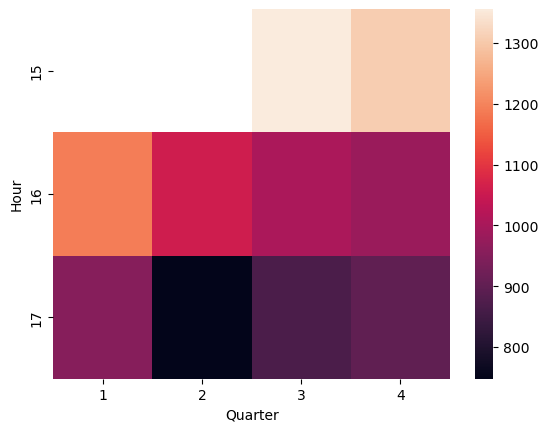

In [117]:
result = df2.pivot(index='Hour', columns='Quarter', values='Average Flow Rate')

sns.heatmap(result, annot=False)
plt.show()

In [89]:
df_flow_rate

,Timestamp,Category,Type,Flow_rate,Hour
0,2023-01-04 17:56:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,890,17
1,2023-01-04 17:55:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,880,17
2,2023-01-04 17:55:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780,17
3,2023-01-04 17:55:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,760,17
4,2023-01-04 17:54:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,780,17
...,...,...,...,...,...
356,2023-01-04 15:41:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1270,15
357,2023-01-04 15:41:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1300,15
358,2023-01-04 15:40:47.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1350,15
359,2023-01-04 15:40:27.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1340,15


In [119]:
df_event_detail['Type'].unique()

array(['Detector Off', 'Total Comm Attempts', 'Failed Comm Attempts',
       'Percent Comm Loss', 'Average Response Time (ms)', 'Detector On',
       'Ramp Meter - Mainline Avg. Flow Rate',
       'Ramp Meter - Mainline Avg. Occ.',
       'Ramp Meter - Mainline Avg. Speed',
       'Ramp Meter - Lane 1 Base Rate', 'Ramp Meter - Lane 1 Active Rate',
       'Ramp Meter - Begin Red', 'Ramp Meter - Begin Green',
       'Ramp Meter - Lane Red Light Violation', 'Time Drift (sec)',
       'Ramp Meter - Startup Red'], dtype=object)

In [122]:
df_ramp_rate = df_event_detail.loc[df_event_detail['Type']=='Ramp Meter - Lane 1 Active Rate'].reset_index(drop=True)
df_ramp_rate['Hour'] = df_ramp_rate['Timestamp'].apply(lambda x:x.hour)
df_ramp_rate = df_ramp_rate.rename(columns={'Event Value':'Ramp_Metering_rate'})

In [127]:
df_ramp_rate_aggregate = pd.DataFrame({'Average Ramp Metering Rate':df_ramp_rate.groupby([pd.Grouper(key='Timestamp',freq='15min'),'Hour']).Ramp_Metering_rate.mean()}).reset_index()
df_ramp_rate_aggregate['Quarter'] = df_ramp_rate_aggregate['Timestamp'].apply(lambda x:(x.minute)//15+1)

In [128]:
df_ramp_rate_aggregate

,Timestamp,Hour,Average Ramp Metering Rate,Quarter
0,2023-01-04 15:45:00,15,565.000000,4
1,2023-01-04 16:00:00,16,529.687500,1
2,2023-01-04 16:15:00,16,416.666667,2
3,2023-01-04 16:30:00,16,427.500000,3
4,2023-01-04 16:45:00,16,418.000000,4
5,2023-01-04 17:00:00,17,415.000000,1
6,2023-01-04 17:15:00,17,394.375000,2
7,2023-01-04 17:30:00,17,394.375000,3
8,2023-01-04 17:45:00,17,395.000000,4


In [187]:
df_ramp_rate_aggregate

,Timestamp,Hour,Average Ramp Metering Rate,Quarter,Green Time
0,2023-01-04 15:45:00,15,565.000000,4,420.6
1,2023-01-04 16:00:00,16,529.687500,1,655.2
2,2023-01-04 16:15:00,16,416.666667,2,1661.6
3,2023-01-04 16:30:00,16,427.500000,3,2609.3
4,2023-01-04 16:45:00,16,418.000000,4,2499.7
5,2023-01-04 17:00:00,17,415.000000,1,2554.9
6,2023-01-04 17:15:00,17,394.375000,2,2553.7
7,2023-01-04 17:30:00,17,394.375000,3,2596.0
8,2023-01-04 17:45:00,17,395.000000,4,2064.5


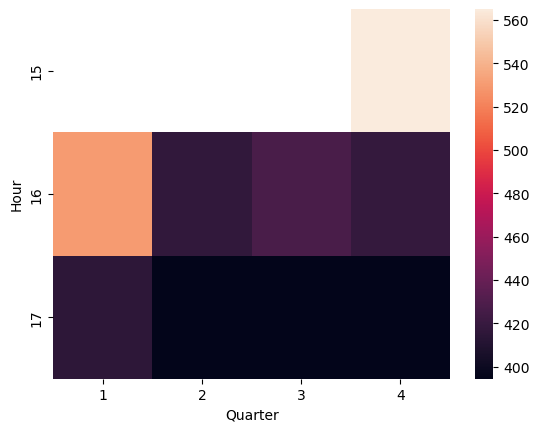

In [129]:
result = df_ramp_rate_aggregate.pivot(index='Hour', columns='Quarter', values='Average Ramp Metering Rate')

sns.heatmap(result, annot=False)
plt.show()

In [130]:
df_event_detail

,Timestamp,Category,Type,Event Value
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0
...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103


In [134]:
df_green_time_estimation = df_event_detail.loc[(df_event_detail['Type']=='Ramp Meter - Begin Green') | (df_event_detail['Type']=='Ramp Meter - Begin Red')].reset_index(drop=True)



In [135]:
df_green_time_estimation

,Timestamp,Category,Type,Event Value
0,2023-01-04 17:55:26.900,Ramp Meter Events,Ramp Meter - Begin Red,1
1,2023-01-04 17:55:24.800,Ramp Meter Events,Ramp Meter - Begin Green,1
2,2023-01-04 17:55:01.500,Ramp Meter Events,Ramp Meter - Begin Red,1
3,2023-01-04 17:54:59.400,Ramp Meter Events,Ramp Meter - Begin Green,1
4,2023-01-04 17:54:52.100,Ramp Meter Events,Ramp Meter - Begin Red,1
...,...,...,...,...
1166,2023-01-04 15:51:44.400,Ramp Meter Events,Ramp Meter - Begin Red,1
1167,2023-01-04 15:51:42.300,Ramp Meter Events,Ramp Meter - Begin Green,1
1168,2023-01-04 15:51:39.200,Ramp Meter Events,Ramp Meter - Begin Red,1
1169,2023-01-04 15:51:37.100,Ramp Meter Events,Ramp Meter - Begin Green,1


In [139]:
def green_time_calculator(df,start,end):
    total_green_time = 0
    start_time = 0
    end_time = 0
    for i in range(len(df)):
        if df['Type'][i] == 'Ramp Meter - Begin Green':
            start_time = df['Timestamp'][i]
        else:
            if start_time != 0:
                end_time = df['Timestamp'][i]
                total_green_time += (start_time - end_time).total_seconds()
                #print(total_green_time)
    #If first event is Begin Red, add green time from start till first event
    if df['Type'][0] == 'Ramp Meter - Begin Red':
        total_green_time += (df['Timestamp'][0] - start).total_seconds()
    
    #If last event is Begin Green, add green time from last event till end
    if df['Type'][len(df)-1] == 'Ramp Meter - Begin Green':
        total_green_time += (end - df['Timestamp'][len(df)-1]).total_seconds()
    
    return(total_green_time)

In [138]:
(df_green_time_estimation['Timestamp'][0]-df_green_time_estimation['Timestamp'][1]).total_seconds()

2.1

In [154]:
green_time_array = []
all_start_timestamps = np.array(df_ramp_rate_aggregate['Timestamp'])
for i in range(len(df_ramp_rate_aggregate)):
    s = df_ramp_rate_aggregate['Timestamp'][i]
    e = df_ramp_rate_aggregate['Timestamp'][i] + datetime.timedelta(minutes=15)
    df = df_green_time_estimation.loc[(df_green_time_estimation['Timestamp']>= df_ramp_rate_aggregate['Timestamp'][i])& (df_green_time_estimation['Timestamp']< df_ramp_rate_aggregate['Timestamp'][i]+datetime.timedelta(minutes=15))].reset_index(drop=True)
    green_time_array.append(green_time_calculator(df,s,e))

In [156]:
df_ramp_rate_aggregate['Green Time'] = green_time_array

In [157]:
df_ramp_rate_aggregate

,Timestamp,Hour,Average Ramp Metering Rate,Quarter,Green Time
0,2023-01-04 15:45:00,15,565.000000,4,420.6
1,2023-01-04 16:00:00,16,529.687500,1,655.2
2,2023-01-04 16:15:00,16,416.666667,2,1661.6
3,2023-01-04 16:30:00,16,427.500000,3,2609.3
4,2023-01-04 16:45:00,16,418.000000,4,2499.7
5,2023-01-04 17:00:00,17,415.000000,1,2554.9
6,2023-01-04 17:15:00,17,394.375000,2,2553.7
7,2023-01-04 17:30:00,17,394.375000,3,2596.0
8,2023-01-04 17:45:00,17,395.000000,4,2064.5


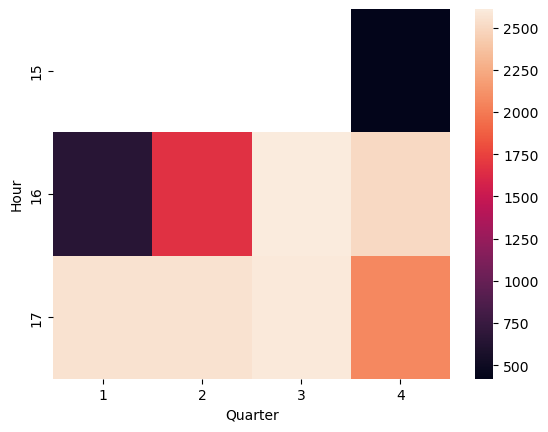

In [158]:
result = df_ramp_rate_aggregate.pivot(index='Hour', columns='Quarter', values='Green Time')

sns.heatmap(result, annot=False)
plt.show()

# Ramp Loop Detector Data

In [173]:
file_name = './2023-01-04 Cypress 101/Data/101 Cypress - Detector Data Demand.csv'
df_demand = pd.read_csv(file_name)
df_demand['Timestamp'] = pd.to_datetime(df_demand['Timestamp'])

In [174]:
df_demand

,Timestamp,Period (Minutes),Volume
0,2023-01-04 15:06:00,15,335
1,2023-01-04 15:21:00,15,625
2,2023-01-04 15:36:00,15,415
3,2023-01-04 15:51:00,15,570
4,2023-01-04 16:06:00,15,415
5,2023-01-04 16:21:00,15,335
6,2023-01-04 16:36:00,15,280
7,2023-01-04 16:51:00,15,315
8,2023-01-04 17:06:00,15,315
9,2023-01-04 17:21:00,15,325


In [177]:
df_demand['Hour'] = df_demand['Timestamp'].apply(lambda x: x.hour)
df_demand['Quarter'] = df_demand['Timestamp'].apply(lambda x: (x.minute//15))
df_demand

,Timestamp,Period (Minutes),Volume,Hour,Quarter
0,2023-01-04 15:06:00,15,335,15,0
1,2023-01-04 15:21:00,15,625,15,1
2,2023-01-04 15:36:00,15,415,15,2
3,2023-01-04 15:51:00,15,570,15,3
4,2023-01-04 16:06:00,15,415,16,0
5,2023-01-04 16:21:00,15,335,16,1
6,2023-01-04 16:36:00,15,280,16,2
7,2023-01-04 16:51:00,15,315,16,3
8,2023-01-04 17:06:00,15,315,17,0
9,2023-01-04 17:21:00,15,325,17,1


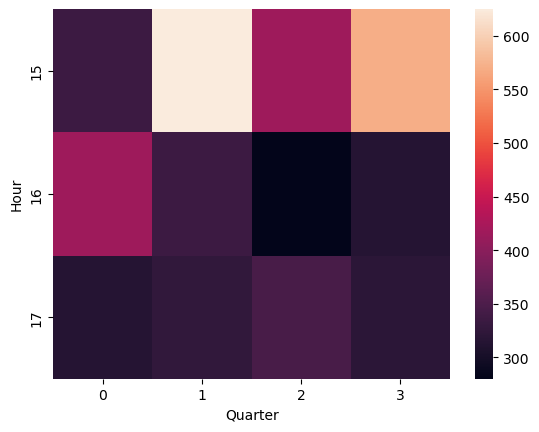

In [180]:
result = df_demand.pivot(index='Hour', columns='Quarter', values='Volume')

sns.heatmap(result, annot=False)
plt.show()

In [178]:
file_name = './2023-01-04 Cypress 101/Data/101 Cypress - Detector Data Passage.csv'
df_passage = pd.read_csv(file_name)
df_passage['Timestamp'] = pd.to_datetime(df_passage['Timestamp'])

In [179]:
df_passage['Hour'] = df_passage['Timestamp'].apply(lambda x: x.hour)
df_passage['Quarter'] = df_passage['Timestamp'].apply(lambda x: (x.minute//15))
df_passage

,Timestamp,Period (Minutes),Volume,Hour,Quarter
0,2023-01-04 15:06:00,15,355,15,0
1,2023-01-04 15:21:00,15,630,15,1
2,2023-01-04 15:36:00,15,425,15,2
3,2023-01-04 15:51:00,15,125,15,3
4,2023-01-04 16:06:00,15,0,16,0
5,2023-01-04 16:21:00,15,460,16,1
6,2023-01-04 16:36:00,15,415,16,2
7,2023-01-04 16:51:00,15,430,16,3
8,2023-01-04 17:06:00,15,400,17,0
9,2023-01-04 17:21:00,15,505,17,1


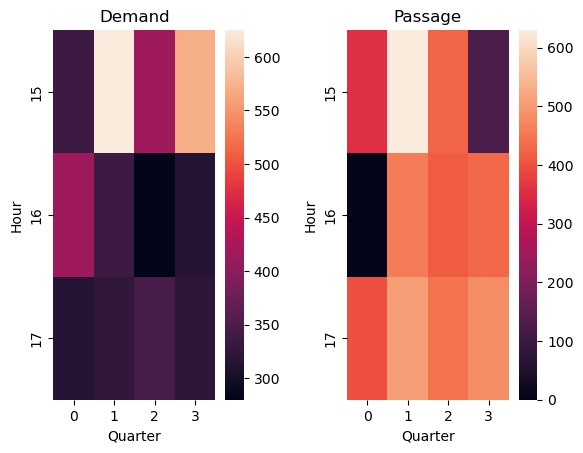

In [194]:
result1 = df_demand.pivot(index='Hour', columns='Quarter', values='Volume')



result = df_passage.pivot(index='Hour', columns='Quarter', values='Volume')

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(result1, annot=False, ax=ax1)
sns.heatmap(result, annot=False, ax=ax2)

ax1.set_title('Demand')
ax2.set_title('Passage')

plt.subplots_adjust(wspace=0.45)

plt.show()

result1 = df2.pivot(index='Hour', columns='Quarter', values='Average Flow Rate')

result = df_ramp_rate_aggregate.pivot(index='Hour', columns='Quarter', values='Average Ramp Metering Rate')
#sns.heatmap(result1, annot=False)

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(result1, annot=False, ax=ax1)
sns.heatmap(result, annot=False, ax=ax2)


ax1.set_title('Average Flow Rate')
ax2.set_title('Average Ramp Metering Rate')

plt.subplots_adjust(wspace=0.45)

plt.show()

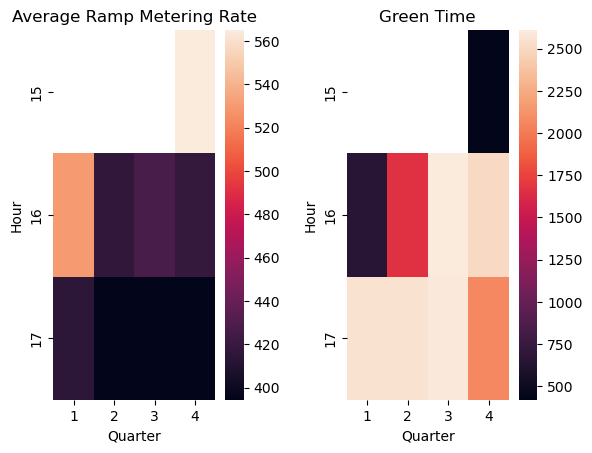

In [196]:
result1 = df_ramp_rate_aggregate.pivot(index='Hour', columns='Quarter', values='Average Ramp Metering Rate')
result = df_ramp_rate_aggregate.pivot(index='Hour', columns='Quarter', values='Green Time')

fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(result1, annot=False, ax=ax1)
sns.heatmap(result, annot=False, ax=ax2)


ax1.set_title('Average Ramp Metering Rate')
ax2.set_title('Green Time')

plt.subplots_adjust(wspace=0.45)
plt.show()

In [4]:
file_name = './2023-01-04 Cypress 101/Data/101 Cypress - Device Event Detail (raw data).xlsx'
xl_file = pd.ExcelFile(file_name)

dfs = {sheet_name: xl_file.parse(sheet_name) 
          for sheet_name in xl_file.sheet_names}
df_event_detail = dfs['Data']
df_event_detail = df_event_detail.drop(axis=1, columns=[' '])
dict1 = {}
for column in df_event_detail.columns:
    dict1[column] = column.strip()
df_event_detail = df_event_detail.rename(columns=dict1)

df_event_detail['Timestamp'] = df_event_detail['Timestamp'].apply(lambda x: x.strip())
df_event_detail['Category'] = df_event_detail['Category'].apply(lambda x: x.strip())
#df_event_detail['Event Value'] = df_event_detail['Event Value'].apply(lambda x: x.strip())
df_event_detail['Type'] = df_event_detail['Type'].apply(lambda x: x.strip())
df_event_detail['Timestamp'] = pd.to_datetime(df_event_detail['Timestamp'])

In [9]:
df_event_detail

,Timestamp,Category,Type,Event_value
0,2023-01-04 17:56:10.900,Detector Events,Detector Off,11
1,2023-01-04 17:56:10.700,Detector Events,Detector Off,32
2,2023-01-04 17:56:10.500,Detector Events,Detector Off,2
3,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Total Comm Attempts,299
4,2023-01-04 17:56:10.100,Comunication and Time Drift Events,Failed Comm Attempts,0
...,...,...,...,...
37369,2023-01-04 15:40:08.500,Detector Events,Detector On,2
37370,2023-01-04 15:40:07.900,Detector Events,Detector On,2
37371,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Flow Rate,1320
37372,2023-01-04 15:40:07.400,Ramp Meter Events,Ramp Meter - Mainline Avg. Occ.,103


In [8]:
df_event_detail = df_event_detail.rename(columns={'Event Value':'Event_value'})

In [34]:
df_gr = pd.DataFrame({'Aggregate ramp metering rate':df_event_detail.query('Type == "Ramp Meter - Lane 1 Active Rate"').groupby([pd.Grouper(key='Timestamp',freq='5min'),'Type']).Event_value.mean()}).reset_index()




In [38]:
df_ramp_metering_rate = df_gr.reset_index()

In [39]:
df_ramp_metering_rate

,index,Timestamp,Type,Aggregate ramp metering rate
0,0,2023-01-04 15:50:00,Ramp Meter - Lane 1 Active Rate,578.750000
1,1,2023-01-04 15:55:00,Ramp Meter - Lane 1 Active Rate,510.000000
2,2,2023-01-04 16:00:00,Ramp Meter - Lane 1 Active Rate,512.500000
3,3,2023-01-04 16:05:00,Ramp Meter - Lane 1 Active Rate,585.714286
4,4,2023-01-04 16:10:00,Ramp Meter - Lane 1 Active Rate,433.333333
5,5,2023-01-04 16:15:00,Ramp Meter - Lane 1 Active Rate,410.000000
6,6,2023-01-04 16:20:00,Ramp Meter - Lane 1 Active Rate,411.250000
7,7,2023-01-04 16:25:00,Ramp Meter - Lane 1 Active Rate,445.000000
8,8,2023-01-04 16:30:00,Ramp Meter - Lane 1 Active Rate,427.500000
9,9,2023-01-04 16:35:00,Ramp Meter - Lane 1 Active Rate,410.000000


In [17]:
df_gr.to_csv('abc.csv')

In [22]:
df_gr.columns

Index(['Aggregate ramp metering rate'], dtype='object')

In [27]:
df_gr.index

MultiIndex([('2023-01-04 15:40:00',           'Average Response Time (ms)'),
            ('2023-01-04 15:40:00',                         'Detector Off'),
            ('2023-01-04 15:40:00',                          'Detector On'),
            ('2023-01-04 15:40:00',                 'Failed Comm Attempts'),
            ('2023-01-04 15:40:00',                    'Percent Comm Loss'),
            ('2023-01-04 15:40:00', 'Ramp Meter - Mainline Avg. Flow Rate'),
            ('2023-01-04 15:40:00',      'Ramp Meter - Mainline Avg. Occ.'),
            ('2023-01-04 15:40:00',     'Ramp Meter - Mainline Avg. Speed'),
            ('2023-01-04 15:40:00',                     'Time Drift (sec)'),
            ('2023-01-04 15:40:00',                  'Total Comm Attempts'),
            ...
            ('2023-01-04 17:55:00',                 'Failed Comm Attempts'),
            ('2023-01-04 17:55:00',                    'Percent Comm Loss'),
            ('2023-01-04 17:55:00',             'Ramp Meter 

In [33]:
df_event_detail.query('Type == "Ramp Meter - Lane 1 Active Rate"')

,Timestamp,Category,Type,Event_value
118,2023-01-04 17:55:47.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,410
678,2023-01-04 17:53:07.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,380
2990,2023-01-04 17:44:07.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,410
3589,2023-01-04 17:41:27.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,380
4038,2023-01-04 17:39:47.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,410
...,...,...,...,...
31045,2023-01-04 15:59:27.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,510
32663,2023-01-04 15:54:07.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,445
32721,2023-01-04 15:53:47.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,550
33103,2023-01-04 15:52:27.500,Ramp Meter Events,Ramp Meter - Lane 1 Active Rate,620


In [49]:
df_gr2 = pd.DataFrame({'Aggregate Mainline num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==11').groupby([pd.Grouper(key='Timestamp',freq='5min'),'Type']).Event_value.count()}).reset_index()



In [40]:
df_event_detail['Type'].unique()

array(['Detector Off', 'Total Comm Attempts', 'Failed Comm Attempts',
       'Percent Comm Loss', 'Average Response Time (ms)', 'Detector On',
       'Ramp Meter - Mainline Avg. Flow Rate',
       'Ramp Meter - Mainline Avg. Occ.',
       'Ramp Meter - Mainline Avg. Speed',
       'Ramp Meter - Lane 1 Base Rate', 'Ramp Meter - Lane 1 Active Rate',
       'Ramp Meter - Begin Red', 'Ramp Meter - Begin Green',
       'Ramp Meter - Lane Red Light Violation', 'Time Drift (sec)',
       'Ramp Meter - Startup Red'], dtype=object)

In [41]:
df_event_detail.columns

Index(['Timestamp', 'Category', 'Type', 'Event_value'], dtype='object')

In [52]:
df_gr2['Aggregate Mainline flow rate'] = df_gr2['Aggregate Mainline num vehicles'].apply(lambda x: x*(60/5))

In [53]:
df_gr2

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate
0,2023-01-04 15:40:00,Detector On,101,1212.0
1,2023-01-04 15:45:00,Detector On,115,1380.0
2,2023-01-04 15:50:00,Detector On,100,1200.0
3,2023-01-04 15:55:00,Detector On,86,1032.0
4,2023-01-04 16:00:00,Detector On,88,1056.0
5,2023-01-04 16:05:00,Detector On,94,1128.0
6,2023-01-04 16:10:00,Detector On,76,912.0
7,2023-01-04 16:15:00,Detector On,90,1080.0
8,2023-01-04 16:20:00,Detector On,73,876.0
9,2023-01-04 16:25:00,Detector On,106,1272.0


In [78]:
df_gr4 = pd.DataFrame({'Aggregate Ramp Demand num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==21').groupby([pd.Grouper(key='Timestamp',freq='5min'),'Type']).Event_value.count()}).reset_index()



In [80]:
df_gr4['Aggregate Ramp Demand flow rate'] = df_gr4['Aggregate Ramp Demand num vehicles'].apply(lambda x: x*(60/5))
df_gr4

,Timestamp,Type,Aggregate Ramp Demand num vehicles,Aggregate Ramp Demand flow rate
0,2023-01-04 15:40:00,Detector On,35,420.0
1,2023-01-04 15:45:00,Detector On,25,300.0
2,2023-01-04 15:50:00,Detector On,30,360.0
3,2023-01-04 15:55:00,Detector On,24,288.0
4,2023-01-04 16:00:00,Detector On,19,228.0
5,2023-01-04 16:05:00,Detector On,25,300.0
6,2023-01-04 16:10:00,Detector On,19,228.0
7,2023-01-04 16:15:00,Detector On,20,240.0
8,2023-01-04 16:20:00,Detector On,18,216.0
9,2023-01-04 16:25:00,Detector On,18,216.0


In [81]:
df_gr5 = pd.DataFrame({'Aggregate Ramp Passage num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==23').groupby([pd.Grouper(key='Timestamp',freq='5min'),'Type']).Event_value.count()}).reset_index()
df_gr5['Aggregate Ramp Passage flow rate'] = df_gr5['Aggregate Ramp Passage num vehicles'].apply(lambda x: x*(60/5))

In [82]:
df_gr5

,Timestamp,Type,Aggregate Ramp Passage num vehicles,Aggregate Ramp Passage flow rate
0,2023-01-04 16:00:00,Detector On,24,288.0
1,2023-01-04 16:05:00,Detector On,32,384.0
2,2023-01-04 16:10:00,Detector On,27,324.0
3,2023-01-04 16:15:00,Detector On,29,348.0
4,2023-01-04 16:20:00,Detector On,25,300.0
5,2023-01-04 16:25:00,Detector On,27,324.0
6,2023-01-04 16:30:00,Detector On,32,384.0
7,2023-01-04 16:35:00,Detector On,32,384.0
8,2023-01-04 16:40:00,Detector On,20,240.0
9,2023-01-04 16:45:00,Detector On,36,432.0


In [90]:
print(df_gr5['Timestamp'][0].time())

16:00:00


In [96]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().xaxis.set_major_formatter(xformatter)
plt.step(df_gr5['Timestamp'],df_gr5['Aggregate Ramp Passage flow rate'])
plt.xticks(ticks= df_gr5['Timestamp'] ,rotation=45)
plt.show()

AttributeError: 'Figure' object has no attribute 'xaxis'

<Figure size 640x480 with 0 Axes>

In [102]:
df_gr2.columns

Index(['Timestamp', 'Type', 'Aggregate Mainline num vehicles',
       'Aggregate Mainline flow rate'],
      dtype='object')

************5 Minute Aggregate********


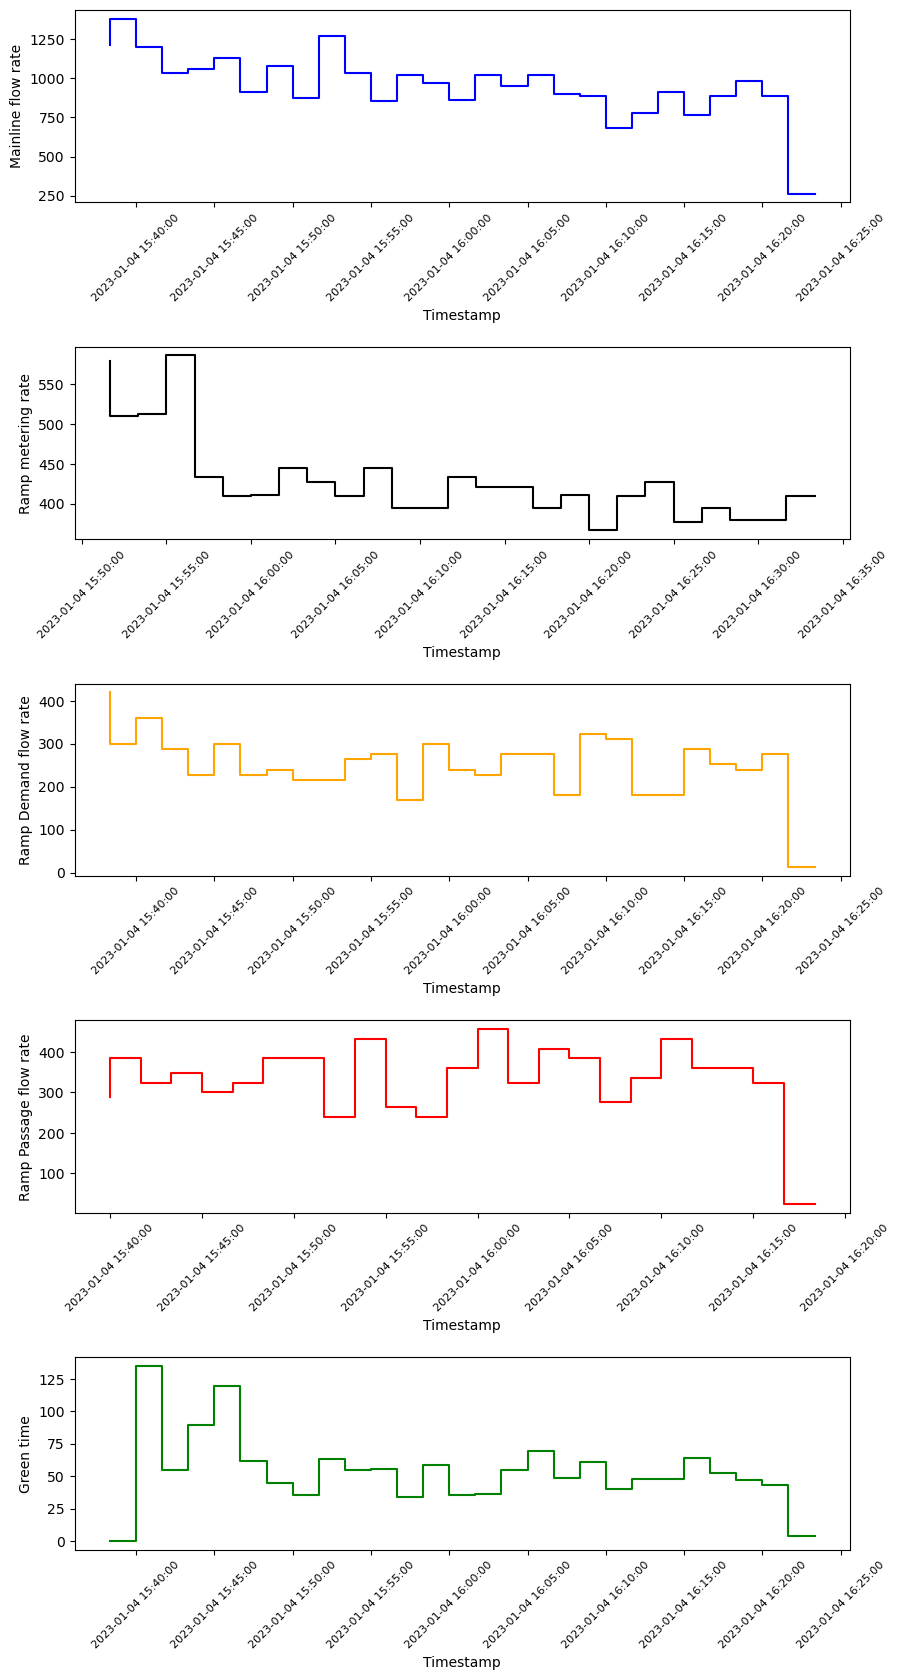

In [144]:
df_gr4.columns

Index(['Timestamp', 'Type', 'Aggregate Ramp Demand num vehicles',
       'Aggregate Ramp Demand flow rate'],
      dtype='object')

In [145]:
df_gr5.columns

Index(['Timestamp', 'Type', 'Aggregate Ramp Passage num vehicles',
       'Aggregate Ramp Passage flow rate'],
      dtype='object')

In [146]:
df_gr3.columns

Index(['Timestamp', 'Green_time'], dtype='object')

In [92]:
a = [i.time() for i in df_gr5['Timestamp']]

In [93]:
a

[datetime.time(16, 0),
 datetime.time(16, 5),
 datetime.time(16, 10),
 datetime.time(16, 15),
 datetime.time(16, 20),
 datetime.time(16, 25),
 datetime.time(16, 30),
 datetime.time(16, 35),
 datetime.time(16, 40),
 datetime.time(16, 45),
 datetime.time(16, 50),
 datetime.time(16, 55),
 datetime.time(17, 0),
 datetime.time(17, 5),
 datetime.time(17, 10),
 datetime.time(17, 15),
 datetime.time(17, 20),
 datetime.time(17, 25),
 datetime.time(17, 30),
 datetime.time(17, 35),
 datetime.time(17, 40),
 datetime.time(17, 45),
 datetime.time(17, 50),
 datetime.time(17, 55)]

# Green Time

In [74]:
df_green_time_estimation = df_event_detail.loc[(df_event_detail['Type']=='Ramp Meter - Begin Green') | (df_event_detail['Type']=='Ramp Meter - Begin Red')].reset_index(drop=True)


def green_time_calculator(df,start,end):
    total_green_time = 0
    start_time = 0
    end_time = 0
    for i in range(len(df)):
        if df['Type'][i] == 'Ramp Meter - Begin Red':
            start_time = df['Timestamp'][i]
        else:
            if start_time != 0:
                end_time = df['Timestamp'][i]
                total_green_time += (start_time - end_time).total_seconds()
                #print(total_green_time)
                #print(total_green_time)
    #If first event is Begin Red, add green time from start till first event
    if df['Type'][len(df)-1] == 'Ramp Meter - Begin Red':
        #print("Add:",(df['Timestamp'][0] - start).total_seconds())
        total_green_time += (df['Timestamp'][len(df)-1] - start).total_seconds()
    
    #If last event is Begin Green, add green time from last event till end
    if df['Type'][0] == 'Ramp Meter - Begin Green':
        total_green_time += (end - df['Timestamp'][0]).total_seconds()
    
    #print(total_green_time)
    return(total_green_time)


green_time_array = []
all_start_timestamps = np.array(df_gr2['Timestamp'])
for i in range(len(df_gr2)):
    s = df_gr2['Timestamp'][i]
    e = df_gr2['Timestamp'][i] + datetime.timedelta(minutes=5)
    df = df_green_time_estimation.loc[(df_green_time_estimation['Timestamp']>= df_gr2['Timestamp'][i])& (df_green_time_estimation['Timestamp']< df_gr2['Timestamp'][i]+datetime.timedelta(minutes=5))].reset_index(drop=True)
    #print(df)
    if len(df)==0:
        green_time_array.append(0)
    else:
        green_time_array.append(green_time_calculator(df,s,e))

In [75]:
green_time_array

[0,
 0,
 134.90000000000003,
 55.10000000000002,
 89.19999999999996,
 119.59999999999994,
 62.100000000000016,
 44.90000000000001,
 35.70000000000001,
 63.50000000000002,
 54.60000000000002,
 55.50000000000002,
 33.80000000000001,
 58.90000000000003,
 35.60000000000001,
 36.60000000000001,
 54.60000000000002,
 69.60000000000001,
 48.30000000000002,
 61.20000000000002,
 40.20000000000001,
 47.80000000000002,
 48.00000000000002,
 63.90000000000003,
 52.40000000000002,
 47.20000000000002,
 43.000000000000014,
 3.6]

In [58]:
len(df)

0

In [66]:
df

,Timestamp,Category,Type,Event_value
0,2023-01-04 17:55:26.900,Ramp Meter Events,Ramp Meter - Begin Red,1
1,2023-01-04 17:55:24.800,Ramp Meter Events,Ramp Meter - Begin Green,1
2,2023-01-04 17:55:01.500,Ramp Meter Events,Ramp Meter - Begin Red,1


In [72]:
df_gr3 = pd.DataFrame()

In [76]:
df_gr3['Timestamp'] = all_start_timestamps
df_gr3['Green_time'] = green_time_array

In [77]:
df_gr3

,Timestamp,Green_time
0,2023-01-04 15:40:00,0.0
1,2023-01-04 15:45:00,0.0
2,2023-01-04 15:50:00,134.9
3,2023-01-04 15:55:00,55.1
4,2023-01-04 16:00:00,89.2
5,2023-01-04 16:05:00,119.6
6,2023-01-04 16:10:00,62.1
7,2023-01-04 16:15:00,44.9
8,2023-01-04 16:20:00,35.7
9,2023-01-04 16:25:00,63.5


In [245]:
df_gr2

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate
0,2023-01-04 15:40:00,Detector On,101,1212.0
1,2023-01-04 15:45:00,Detector On,115,1380.0
2,2023-01-04 15:50:00,Detector On,100,1200.0
3,2023-01-04 15:55:00,Detector On,86,1032.0
4,2023-01-04 16:00:00,Detector On,88,1056.0
5,2023-01-04 16:05:00,Detector On,94,1128.0
6,2023-01-04 16:10:00,Detector On,76,912.0
7,2023-01-04 16:15:00,Detector On,90,1080.0
8,2023-01-04 16:20:00,Detector On,73,876.0
9,2023-01-04 16:25:00,Detector On,106,1272.0


In [249]:
df_gr3

,Timestamp,Green_time
0,2023-01-04 15:40:00,0.0
1,2023-01-04 15:45:00,0.0
2,2023-01-04 15:50:00,134.9
3,2023-01-04 15:55:00,55.1
4,2023-01-04 16:00:00,89.2
5,2023-01-04 16:05:00,119.6
6,2023-01-04 16:10:00,62.1
7,2023-01-04 16:15:00,44.9
8,2023-01-04 16:20:00,35.7
9,2023-01-04 16:25:00,63.5


************5 Minute Aggregate********


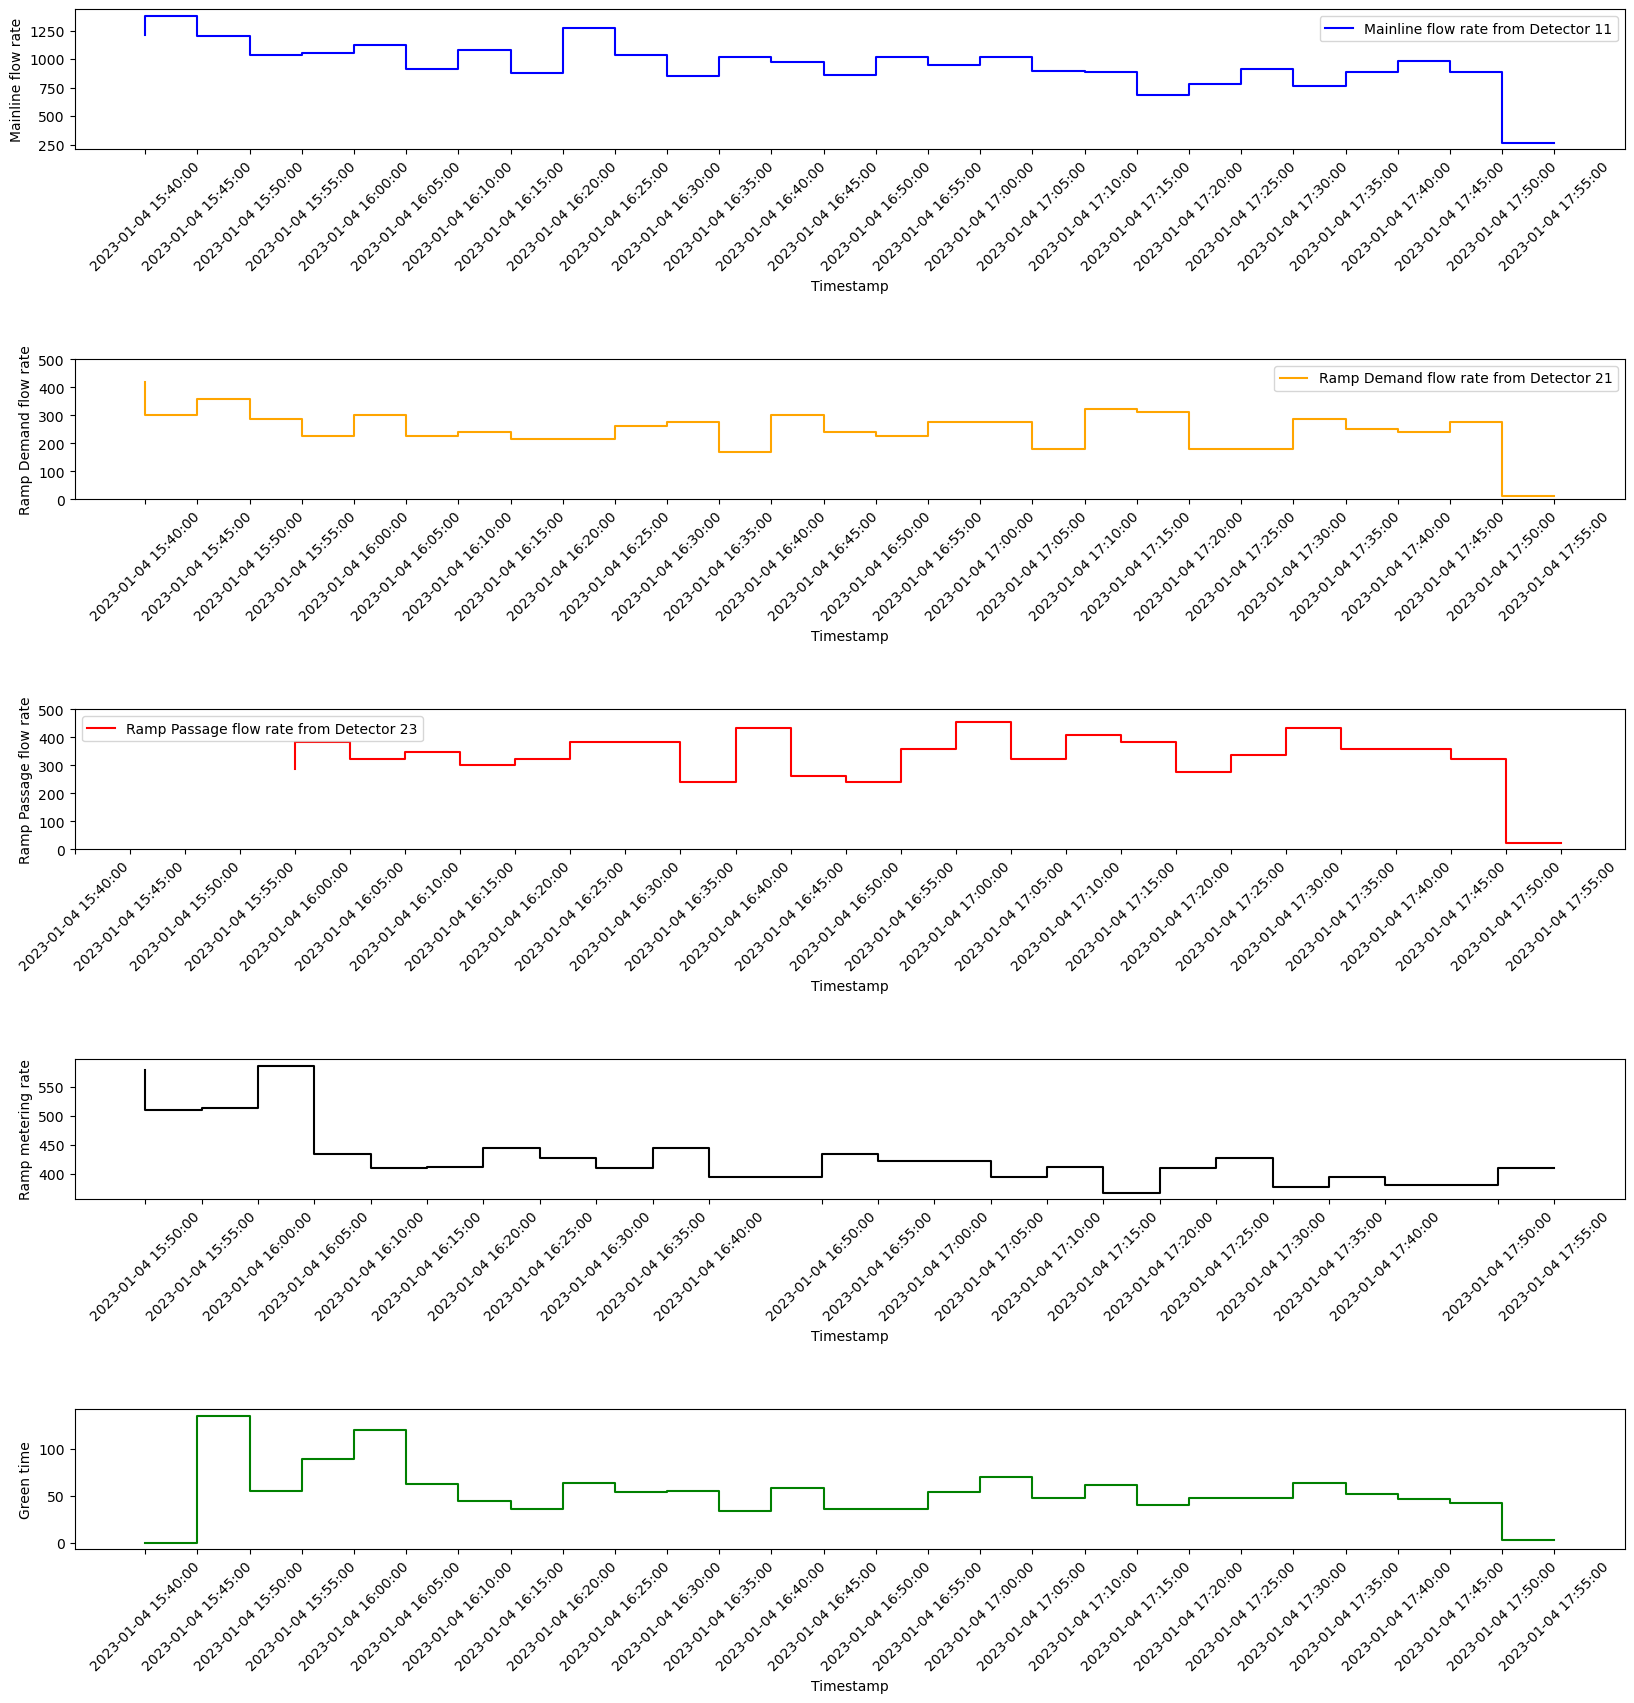

In [265]:
print('************5 Minute Aggregate********')
fig, ax = plt.subplots(5,1)
fig.set_figheight(20)
fig.set_figwidth(20)
ax[0].step(df_gr2['Timestamp'],df_gr2['Aggregate Mainline flow rate'],color='blue')
ax[0].set_xlabel('Timestamp')
ax[0].set_ylabel('Mainline flow rate')
ax[0].legend(['Mainline flow rate from Detector 11'])
ax[0].set_xticks(df_gr2['Timestamp'],df_gr2['Timestamp'],rotation=45)
#ax[0].set_xticklabels(df_gr2['Timestamp'],rotation=45)

ax[1].step(df_gr4['Timestamp'],df_gr4['Aggregate Ramp Demand flow rate'],color='orange')
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel('Ramp Demand flow rate')
ax[1].set_ylim(0,500)
# ax[1].set_xticks(df_gr4['Timestamp'])
# ax[1].set_xticklabels(df_gr4['Timestamp'],rotation=45)
ax[1].legend(['Ramp Demand flow rate from Detector 21'])
ax[1].set_xticks(df_gr4['Timestamp'],df_gr4['Timestamp'],rotation=45)
#plt.setp(ax, xticks=df_gr2['Timestamp'], xticklabels=df_gr2['Timestamp'])


ax[2].step(df_gr5['Timestamp'],df_gr5['Aggregate Ramp Passage flow rate'],color='red')
ax[2].set_xlabel('Timestamp')
ax[2].set_ylabel('Ramp Passage flow rate')
ax[2].set_ylim(0,500)
# ax[2].set_xticks(df_gr4['Timestamp'])
# ax[2].set_xticklabels(df_gr4['Timestamp'],rotation=45)
ax[2].legend(['Ramp Passage flow rate from Detector 23'])
ax[2].set_xticks(df_gr4['Timestamp'],df_gr4['Timestamp'],rotation=45)
#plt.setp(ax, xticks=df_gr2['Timestamp'], xticklabels=df_gr2['Timestamp'])
#plt.setp(labels, rotation=45)

ax[3].step(df_gr['Timestamp'],df_gr['Aggregate ramp metering rate'],color='black')
ax[3].set_xlabel('Timestamp')
ax[3].set_ylabel('Ramp metering rate')
# ax[3].set_xticks(df_gr['Timestamp'])
# ax[3].set_xticklabels(df_gr['Timestamp'],rotation=45)
ax[3].set_xticks(df_gr['Timestamp'],df_gr['Timestamp'],rotation=45)

ax[4].step(df_gr3['Timestamp'],df_gr3['Green_time'],color='green')
ax[4].set_xlabel('Timestamp')
ax[4].set_ylabel('Green time')
# ax[4].set_xticks(df_gr3['Timestamp'])
# ax[4].set_xticklabels(df_gr3['Timestamp'],rotation=45)
ax[4].set_xticks(df_gr3['Timestamp'],df_gr3['Timestamp'],rotation=45)



fig.subplots_adjust(hspace=1.5)
plt.show()

In [268]:
def plot_function(t):
    df_gr = pd.DataFrame({'Aggregate ramp metering rate':df_event_detail.query('Type == "Ramp Meter - Lane 1 Active Rate"').groupby([pd.Grouper(key='Timestamp',freq='{}min'.format(t)),'Type']).Event_value.mean()}).reset_index()
    df_gr2 = pd.DataFrame({'Aggregate Mainline num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==11').groupby([pd.Grouper(key='Timestamp',freq='{}min'.format(t)),'Type']).Event_value.count()}).reset_index()
    df_gr2['Aggregate Mainline flow rate'] = df_gr2['Aggregate Mainline num vehicles'].apply(lambda x: x*(60/t))
    df_gr4 = pd.DataFrame({'Aggregate Ramp Demand num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==21').groupby([pd.Grouper(key='Timestamp',freq='{}min'.format(t)),'Type']).Event_value.count()}).reset_index()
    df_gr4['Aggregate Ramp Demand flow rate'] = df_gr4['Aggregate Ramp Demand num vehicles'].apply(lambda x: x*(60/t))
    #print(df_gr4)
    df_gr5 = pd.DataFrame({'Aggregate Ramp Passage num vehicles':df_event_detail.query('Type == "Detector On" & Event_value==23').groupby([pd.Grouper(key='Timestamp',freq='{}min'.format(t)),'Type']).Event_value.count()}).reset_index()
    df_gr5['Aggregate Ramp Passage flow rate'] = df_gr5['Aggregate Ramp Passage num vehicles'].apply(lambda x: x*(60/t))
    #print(df_gr5)

    df_green_time_estimation = df_event_detail.loc[(df_event_detail['Type']=='Ramp Meter - Begin Green') | (df_event_detail['Type']=='Ramp Meter - Begin Red')].reset_index(drop=True)


    def green_time_calculator(df,start,end):
        total_green_time = 0
        start_time = 0
        end_time = 0
        for i in range(len(df)):
            if df['Type'][i] == 'Ramp Meter - Begin Red':
                start_time = df['Timestamp'][i]
            else:
                if start_time != 0:
                    end_time = df['Timestamp'][i]
                    total_green_time += (start_time - end_time).total_seconds()
                    #print(total_green_time)
                    #print(total_green_time)
        #If first event is Begin Red, add green time from start till first event
        if df['Type'][len(df)-1] == 'Ramp Meter - Begin Red':
            #print("Add:",(df['Timestamp'][0] - start).total_seconds())
            total_green_time += (df['Timestamp'][len(df)-1] - start).total_seconds()

        #If last event is Begin Green, add green time from last event till end
        if df['Type'][0] == 'Ramp Meter - Begin Green':
            total_green_time += (end - df['Timestamp'][0]).total_seconds()

        #print(total_green_time)
        return(total_green_time)


    green_time_array = []
    all_start_timestamps = np.array(df_gr2['Timestamp'])
    for i in range(len(df_gr2)):
        s = df_gr2['Timestamp'][i]
        e = df_gr2['Timestamp'][i] + datetime.timedelta(minutes=t)
        df = df_green_time_estimation.loc[(df_green_time_estimation['Timestamp']>= df_gr2['Timestamp'][i])& (df_green_time_estimation['Timestamp']< df_gr2['Timestamp'][i]+datetime.timedelta(minutes=t))].reset_index(drop=True)
        #print(df)
        if len(df)==0:
            green_time_array.append(0)
        else:
            green_time_array.append(green_time_calculator(df,s,e))
            
    df_gr3 = pd.DataFrame()
    df_gr3['Timestamp'] = all_start_timestamps
    df_gr3['Green_time'] = green_time_array

    print('************{} Minute Aggregate********'.format(t))
    
    fig, ax = plt.subplots(5,1)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    ax[0].step(df_gr2['Timestamp'],df_gr2['Aggregate Mainline flow rate'],color='blue')
    ax[0].set_xlabel('Timestamp')
    ax[0].set_ylabel('Mainline flow rate')
    ax[0].legend(['Mainline flow rate from Detector 11'])
    ax[0].set_xticks(df_gr2['Timestamp'],df_gr2['Timestamp'],rotation=45)
    #ax[0].set_xticklabels(df_gr2['Timestamp'],rotation=45)

    ax[1].step(df_gr4['Timestamp'],df_gr4['Aggregate Ramp Demand flow rate'],color='orange')
    ax[1].set_xlabel('Timestamp')
    ax[1].set_ylabel('Ramp Demand flow rate')
    ax[1].set_ylim(0,500)
    # ax[1].set_xticks(df_gr4['Timestamp'])
    # ax[1].set_xticklabels(df_gr4['Timestamp'],rotation=45)
    ax[1].legend(['Ramp Demand flow rate from Detector 21'])
    ax[1].set_xticks(df_gr4['Timestamp'],df_gr4['Timestamp'],rotation=45)
    #plt.setp(ax, xticks=df_gr2['Timestamp'], xticklabels=df_gr2['Timestamp'])


    ax[2].step(df_gr5['Timestamp'],df_gr5['Aggregate Ramp Passage flow rate'],color='red')
    ax[2].set_xlabel('Timestamp')
    ax[2].set_ylabel('Ramp Passage flow rate')
    ax[2].set_ylim(0,500)
    # ax[2].set_xticks(df_gr4['Timestamp'])
    # ax[2].set_xticklabels(df_gr4['Timestamp'],rotation=45)
    ax[2].legend(['Ramp Passage flow rate from Detector 23'])
    ax[2].set_xticks(df_gr4['Timestamp'],df_gr4['Timestamp'],rotation=45)
    #plt.setp(ax, xticks=df_gr2['Timestamp'], xticklabels=df_gr2['Timestamp'])
    #plt.setp(labels, rotation=45)

    ax[3].step(df_gr['Timestamp'],df_gr['Aggregate ramp metering rate'],color='black')
    ax[3].set_xlabel('Timestamp')
    ax[3].set_ylabel('Ramp metering rate')
    # ax[3].set_xticks(df_gr['Timestamp'])
    # ax[3].set_xticklabels(df_gr['Timestamp'],rotation=45)
    ax[3].set_xticks(df_gr['Timestamp'],df_gr['Timestamp'],rotation=45)

    ax[4].step(df_gr3['Timestamp'],df_gr3['Green_time'],color='green')
    ax[4].set_xlabel('Timestamp')
    ax[4].set_ylabel('Green time')
    # ax[4].set_xticks(df_gr3['Timestamp'])
    # ax[4].set_xticklabels(df_gr3['Timestamp'],rotation=45)
    ax[4].set_xticks(df_gr3['Timestamp'],df_gr3['Timestamp'],rotation=45)



    fig.subplots_adjust(hspace=1.5)
    plt.show()
    
    #Make scatter plots between mainline flow rate vs Ramp metering rate
    #Demand vs Passage ramp
    #Ramp metering rate vs Green time
    #Make scatter plots between 11 and 23

    df_flow_rate_ramp_rate = df_gr2.merge(df_gr,on='Timestamp',how='right')
    df_passage_demand = df_gr4.merge(df_gr5,on='Timestamp',how='right')
    df_green_ramp_rate = df_gr3.merge(df_gr,on='Timestamp',how='right')
    df_passage_mainline = df_gr2.merge(df_gr5,on='Timestamp',how='right')

    plt.scatter(df_flow_rate_ramp_rate['Aggregate ramp metering rate'],df_flow_rate_ramp_rate['Aggregate Mainline flow rate'])
    plt.ylabel('Aggregate Mainline flow rate from Detector 11')
    plt.xlabel('Aggregate Ramp Metering rate')
    plt.title('Ramp Metering rate vs Mainline flow rate')
    plt.show()

    plt.scatter(df_passage_demand['Aggregate Ramp Demand flow rate'],df_passage_demand['Aggregate Ramp Passage flow rate'],c='r')
    plt.ylabel('Aggregate Ramp Passage flow rate from Detector 23')
    plt.xlabel('Aggregate Ramp Demand flow rate from Detector 21')
    plt.title('Ramp Passage vs Ramp Demand')
    plt.show()

    plt.scatter(df_green_ramp_rate['Aggregate ramp metering rate'],df_green_ramp_rate['Green_time'],c='g')
    plt.ylabel('Green time')
    plt.xlabel('Aggregate Ramp Metering rate')
    plt.title('Green time vs Ramp Metering rate')
    plt.show()

    plt.scatter(df_passage_mainline['Aggregate Ramp Passage flow rate'],df_passage_mainline['Aggregate Mainline flow rate'],c='k')
    plt.ylabel('Aggregate Mainline flow rate from Detector 11')
    plt.xlabel('Aggregate Ramp Passage flow rate from Detector 23')
    plt.title('Mainline flow rate vs Ramp Passage flow rate')
    plt.show()
#     import warnings
#     warnings.filterwarnings("ignore")
#     fig, ax = plt.subplots(5,1)
#     fig.set_figheight(20)
#     fig.set_figwidth(10)
#     ax[0].step(df_gr2['Timestamp'],df_gr2['Aggregate Mainline flow rate'],color='blue')
#     #ax[0].set_xticks(ticks= df_gr5['Timestamp'])
#     ax[0].set_xticklabels(df_gr2['Timestamp'],rotation=45,fontsize=8)
#     ax[0].set_xlabel('Timestamp')
#     ax[0].set_ylabel('Mainline flow rate')

#     ax[1].step(df_gr['Timestamp'],df_gr['Aggregate ramp metering rate'],color='black')
#     #ax[0].set_xticks(ticks= df_gr5['Timestamp'])
#     ax[1].set_xticklabels(df_gr['Timestamp'],rotation=45,fontsize=8)
#     ax[1].set_xlabel('Timestamp')
#     ax[1].set_ylabel('Ramp metering rate')

#     ax[2].step(df_gr4['Timestamp'],df_gr4['Aggregate Ramp Demand flow rate'],color='orange')
#     #ax[0].set_xticks(ticks= df_gr5['Timestamp'])
#     ax[2].set_xticklabels(df_gr4['Timestamp'],rotation=45,fontsize=8)
#     ax[2].set_xlabel('Timestamp')
#     ax[2].set_ylabel('Ramp Demand flow rate')

#     ax[3].step(df_gr5['Timestamp'],df_gr5['Aggregate Ramp Passage flow rate'],color='red')
#     #ax[0].set_xticks(ticks= df_gr5['Timestamp'])
#     ax[3].set_xticklabels(df_gr2['Timestamp'],rotation=45,fontsize=8)
#     ax[3].set_xlabel('Timestamp')
#     ax[3].set_ylabel('Ramp Passage flow rate')

#     ax[4].step(df_gr3['Timestamp'],df_gr3['Green_time'],color='green')
#     #ax[0].set_xticks(ticks= df_gr5['Timestamp'])
#     ax[4].set_xticklabels(df_gr3['Timestamp'],rotation=45,fontsize=8)
#     ax[4].set_xlabel('Timestamp')
#     ax[4].set_ylabel('Green time')
#     plt.subplots_adjust(hspace=0.75)
#     plt.show()

************5 Minute Aggregate********


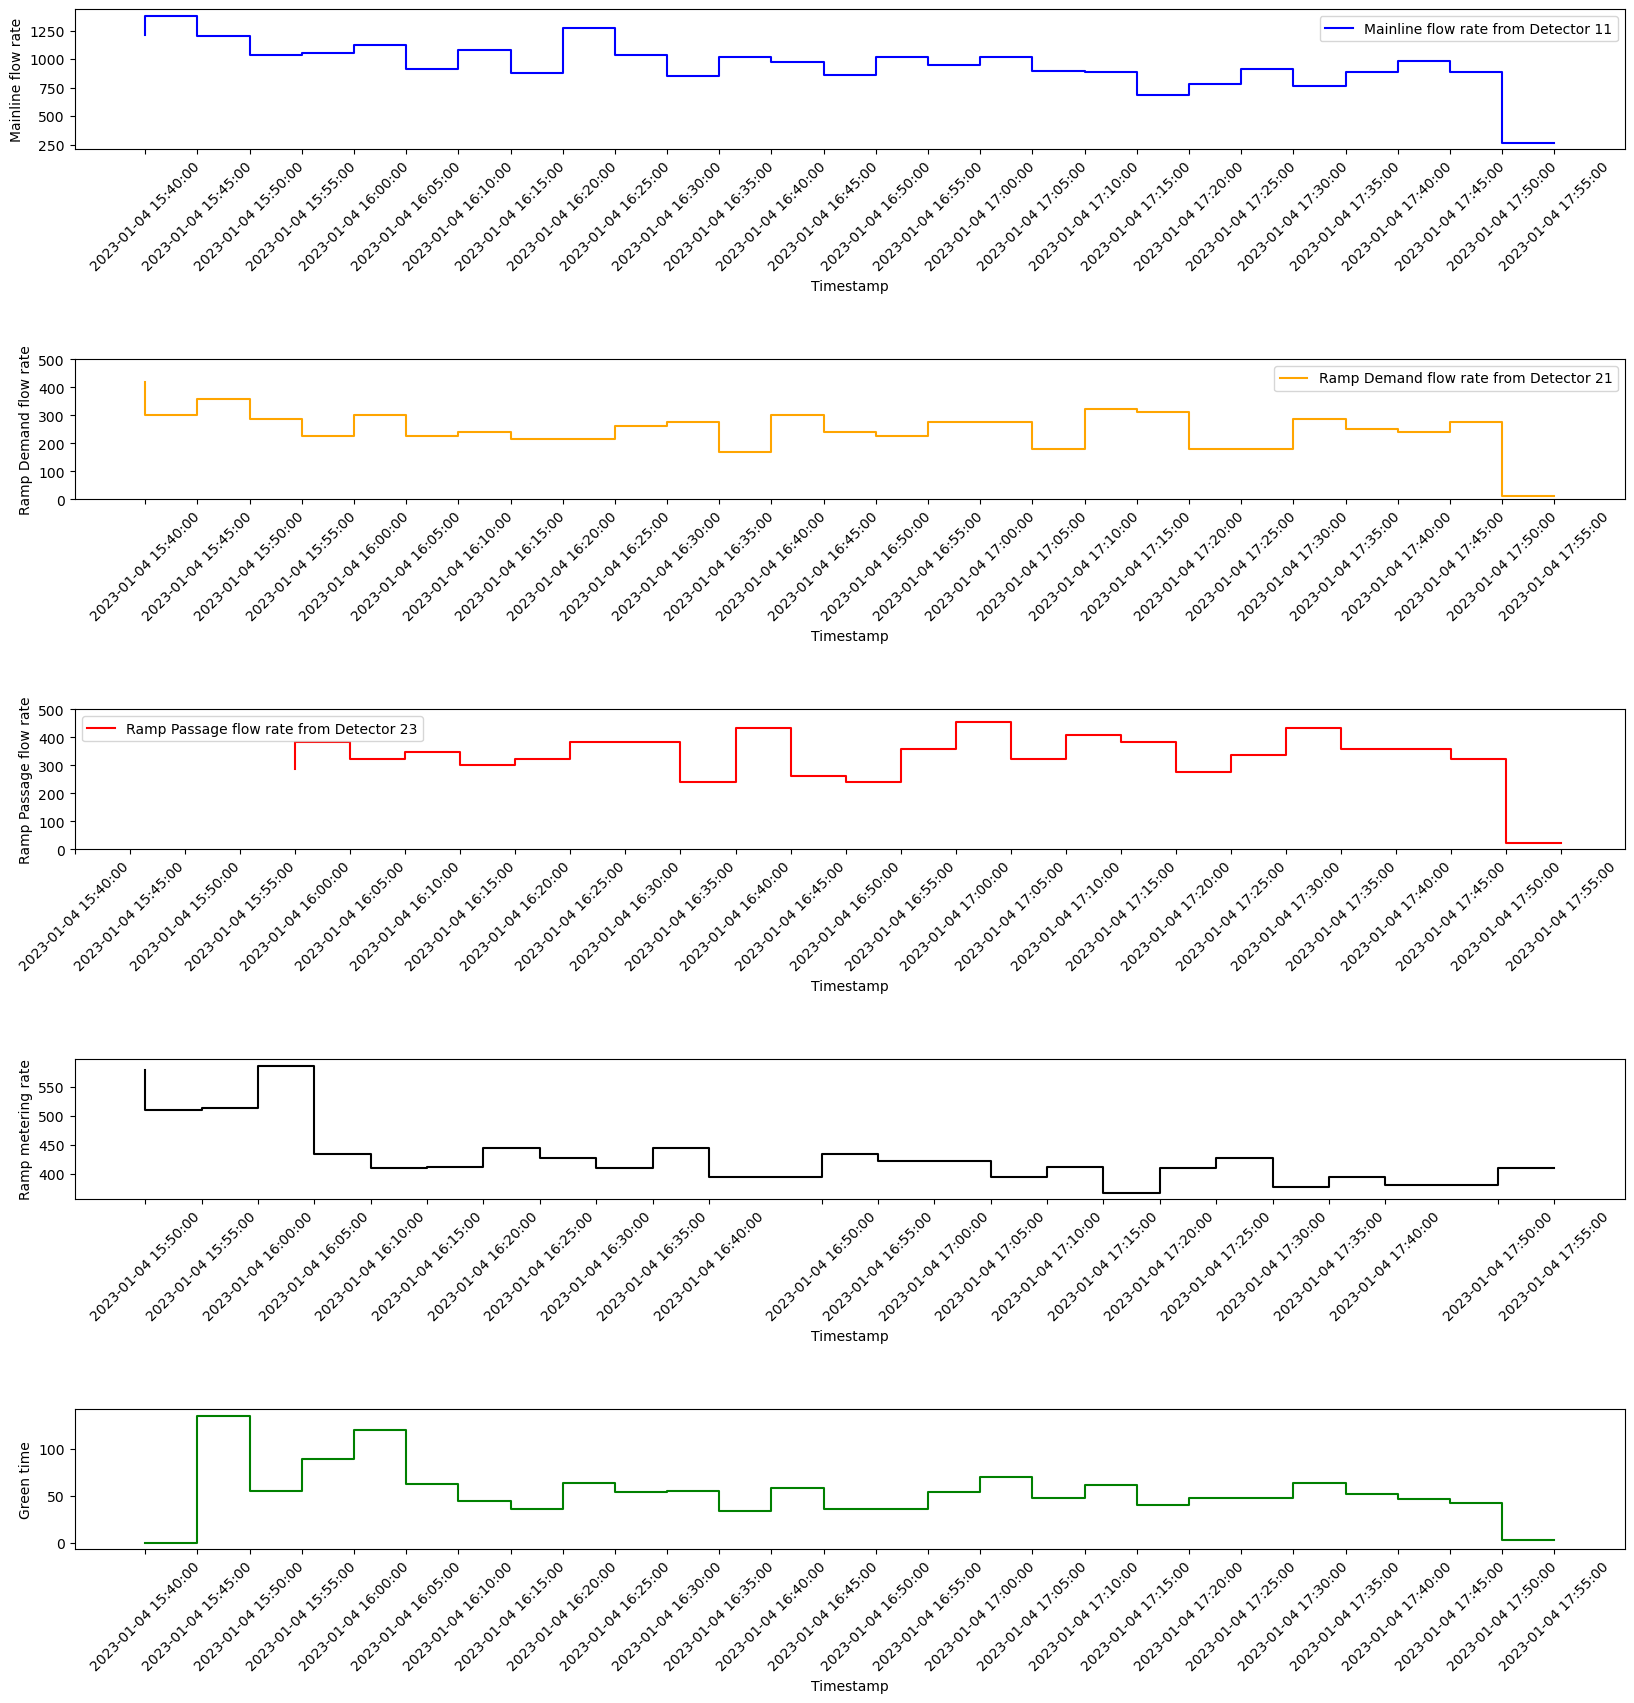

In [269]:
plot_function(5)

************45 Minute Aggregate********


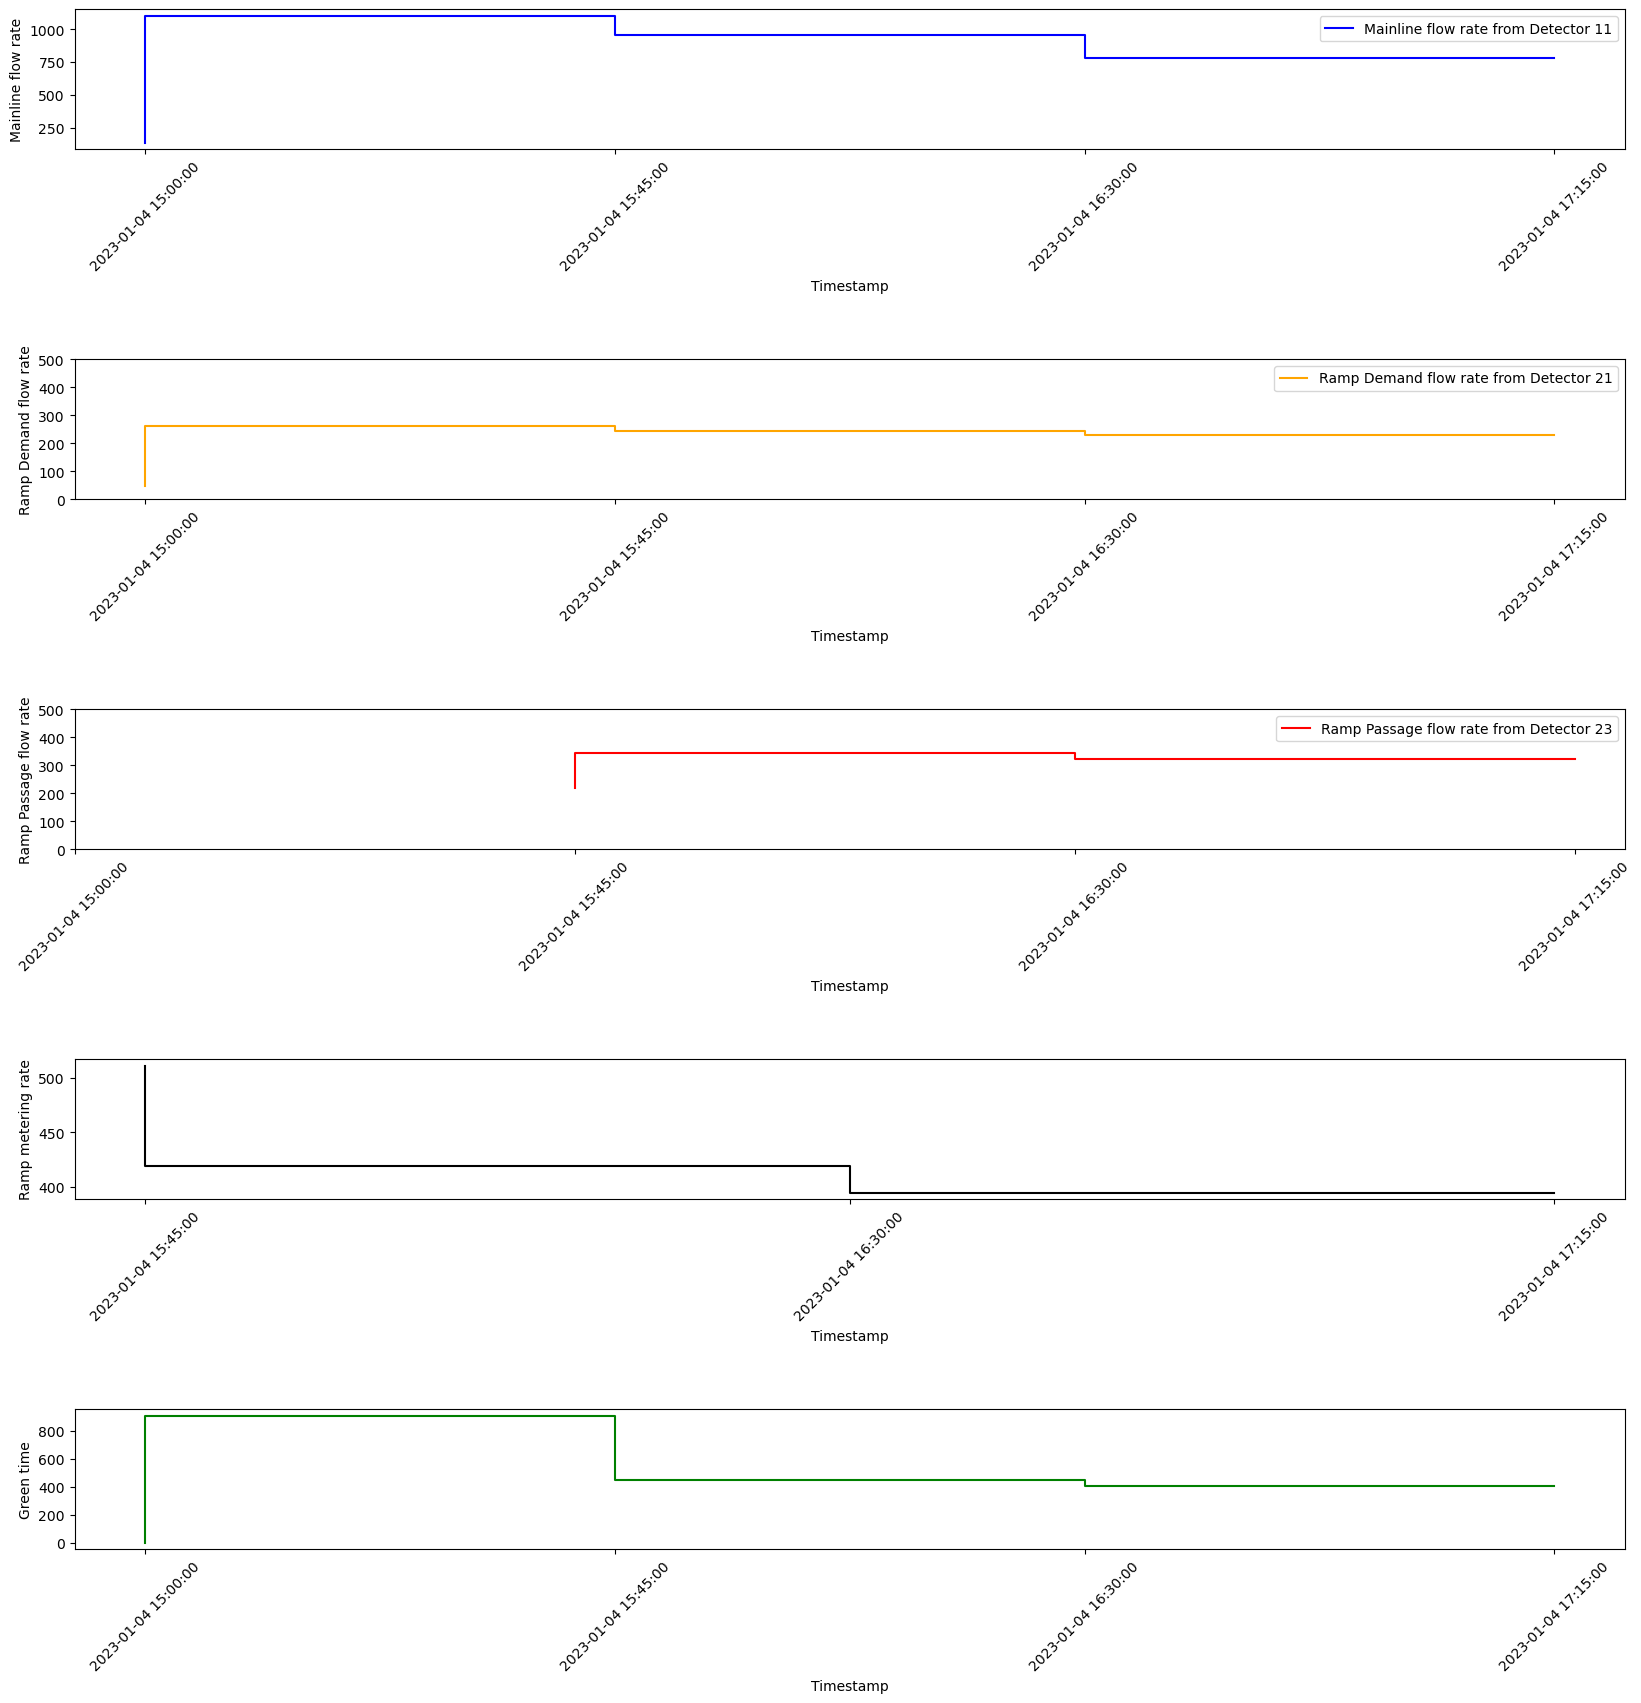

In [272]:
plot_function(45)

In [302]:
df_gr2

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate
0,2023-01-04 15:40:00,Detector On,101,1212.0
1,2023-01-04 15:45:00,Detector On,115,1380.0
2,2023-01-04 15:50:00,Detector On,100,1200.0
3,2023-01-04 15:55:00,Detector On,86,1032.0
4,2023-01-04 16:00:00,Detector On,88,1056.0
5,2023-01-04 16:05:00,Detector On,94,1128.0
6,2023-01-04 16:10:00,Detector On,76,912.0
7,2023-01-04 16:15:00,Detector On,90,1080.0
8,2023-01-04 16:20:00,Detector On,73,876.0
9,2023-01-04 16:25:00,Detector On,106,1272.0


In [275]:
df_gr2

,Timestamp,Type,Aggregate Mainline num vehicles,Aggregate Mainline flow rate
0,2023-01-04 15:40:00,Detector On,101,1212.0
1,2023-01-04 15:45:00,Detector On,115,1380.0
2,2023-01-04 15:50:00,Detector On,100,1200.0
3,2023-01-04 15:55:00,Detector On,86,1032.0
4,2023-01-04 16:00:00,Detector On,88,1056.0
5,2023-01-04 16:05:00,Detector On,94,1128.0
6,2023-01-04 16:10:00,Detector On,76,912.0
7,2023-01-04 16:15:00,Detector On,90,1080.0
8,2023-01-04 16:20:00,Detector On,73,876.0
9,2023-01-04 16:25:00,Detector On,106,1272.0


In [303]:
#mainline flow rate vs Ramp metering rate
df_flow_rate_ramp_rate = df_gr2.merge(df_gr,on='Timestamp',how='right')
df_passage_demand = df_gr4.merge(df_gr5,on='Timestamp',how='right')
df_green_ramp_rate = df_gr3.merge(df_gr,on='Timestamp',how='right')
df_passage_mainline = df_gr2.merge(df_gr5,on='Timestamp',how='right')
df_passage_mainline

,Timestamp,Type_x,Aggregate Mainline num vehicles,Aggregate Mainline flow rate,Type_y,Aggregate Ramp Passage num vehicles,Aggregate Ramp Passage flow rate
0,2023-01-04 16:00:00,Detector On,88,1056.0,Detector On,24,288.0
1,2023-01-04 16:05:00,Detector On,94,1128.0,Detector On,32,384.0
2,2023-01-04 16:10:00,Detector On,76,912.0,Detector On,27,324.0
3,2023-01-04 16:15:00,Detector On,90,1080.0,Detector On,29,348.0
4,2023-01-04 16:20:00,Detector On,73,876.0,Detector On,25,300.0
5,2023-01-04 16:25:00,Detector On,106,1272.0,Detector On,27,324.0
6,2023-01-04 16:30:00,Detector On,86,1032.0,Detector On,32,384.0
7,2023-01-04 16:35:00,Detector On,71,852.0,Detector On,32,384.0
8,2023-01-04 16:40:00,Detector On,85,1020.0,Detector On,20,240.0
9,2023-01-04 16:45:00,Detector On,81,972.0,Detector On,36,432.0


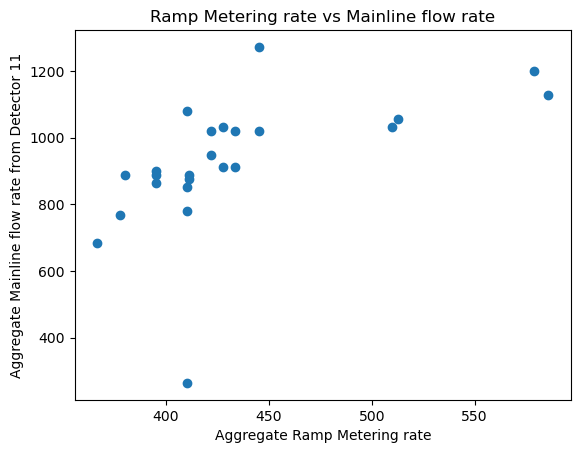

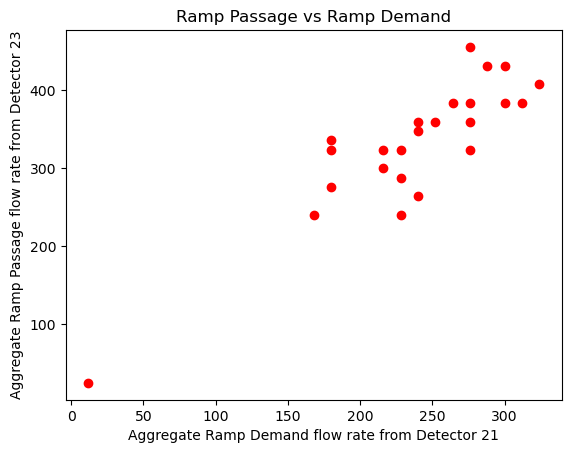

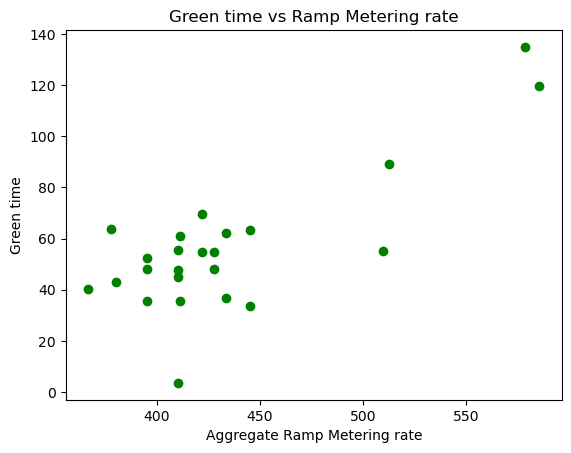

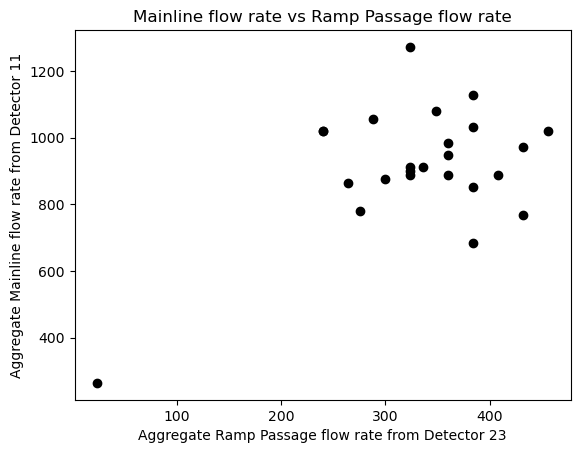

In [305]:
#Make scatter plots between mainline flow rate vs Ramp metering rate
#Demand vs Passage ramp
#Ramp metering rate vs Green time
#Make scatter plots between 11 and 23

df_flow_rate_ramp_rate = df_gr2.merge(df_gr,on='Timestamp',how='right')
df_passage_demand = df_gr4.merge(df_gr5,on='Timestamp',how='right')
df_green_ramp_rate = df_gr3.merge(df_gr,on='Timestamp',how='right')
df_passage_mainline = df_gr2.merge(df_gr5,on='Timestamp',how='right')

plt.scatter(df_flow_rate_ramp_rate['Aggregate ramp metering rate'],df_flow_rate_ramp_rate['Aggregate Mainline flow rate'])
plt.ylabel('Aggregate Mainline flow rate from Detector 11')
plt.xlabel('Aggregate Ramp Metering rate')
plt.title('Ramp Metering rate vs Mainline flow rate')
plt.show()

plt.scatter(df_passage_demand['Aggregate Ramp Demand flow rate'],df_passage_demand['Aggregate Ramp Passage flow rate'],c='r')
plt.ylabel('Aggregate Ramp Passage flow rate from Detector 23')
plt.xlabel('Aggregate Ramp Demand flow rate from Detector 21')
plt.title('Ramp Passage vs Ramp Demand')
plt.show()

plt.scatter(df_green_ramp_rate['Aggregate ramp metering rate'],df_green_ramp_rate['Green_time'],c='g')
plt.ylabel('Green time')
plt.xlabel('Aggregate Ramp Metering rate')
plt.title('Green time vs Ramp Metering rate')
plt.show()

plt.scatter(df_passage_mainline['Aggregate Ramp Passage flow rate'],df_passage_mainline['Aggregate Mainline flow rate'],c='k')
plt.ylabel('Aggregate Mainline flow rate from Detector 11')
plt.xlabel('Aggregate Ramp Passage flow rate from Detector 23')
plt.title('Mainline flow rate vs Ramp Passage flow rate')
plt.show()

************5 Minute Aggregate********


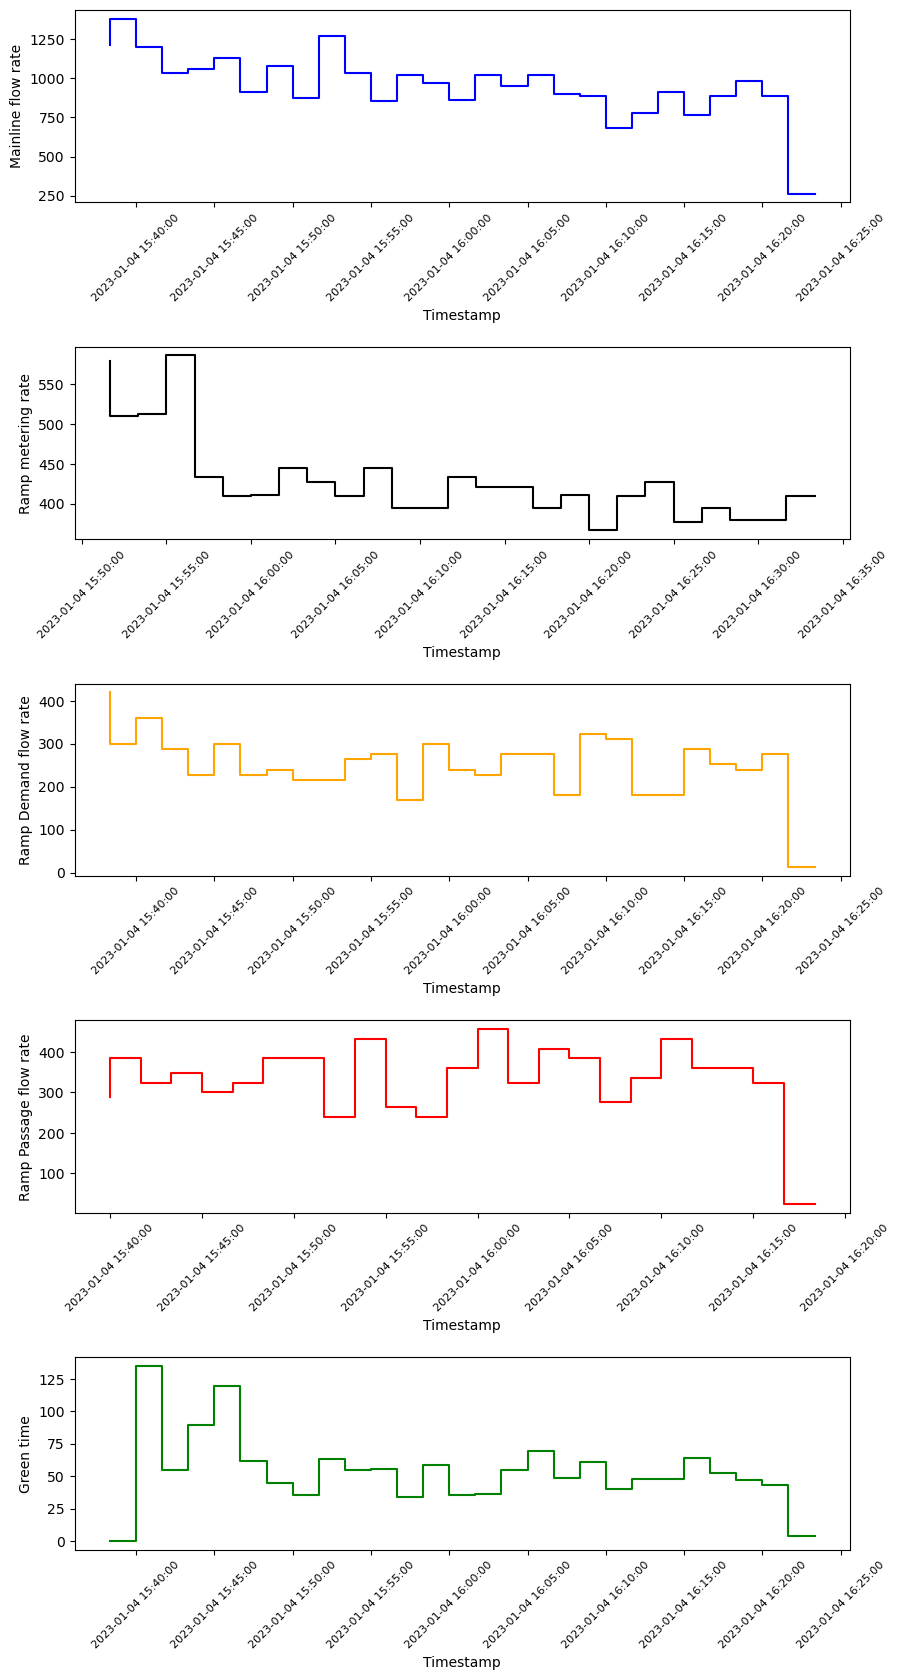

In [185]:
plot_function(5)

************30 Minute Aggregate********


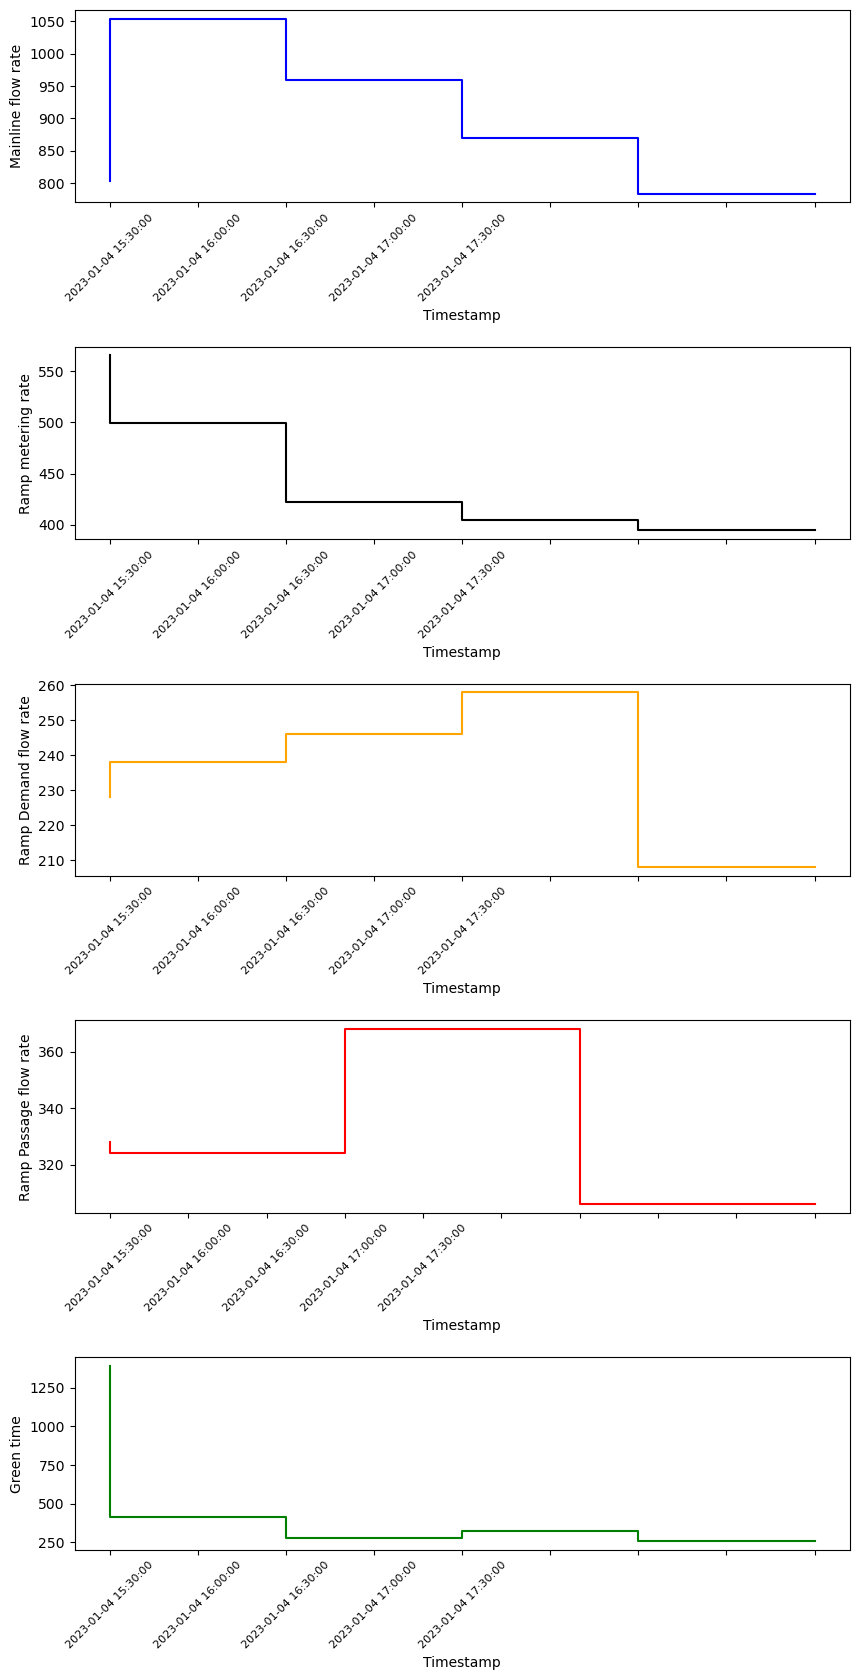

In [188]:
plot_function(30)

************15 Minute Aggregate********


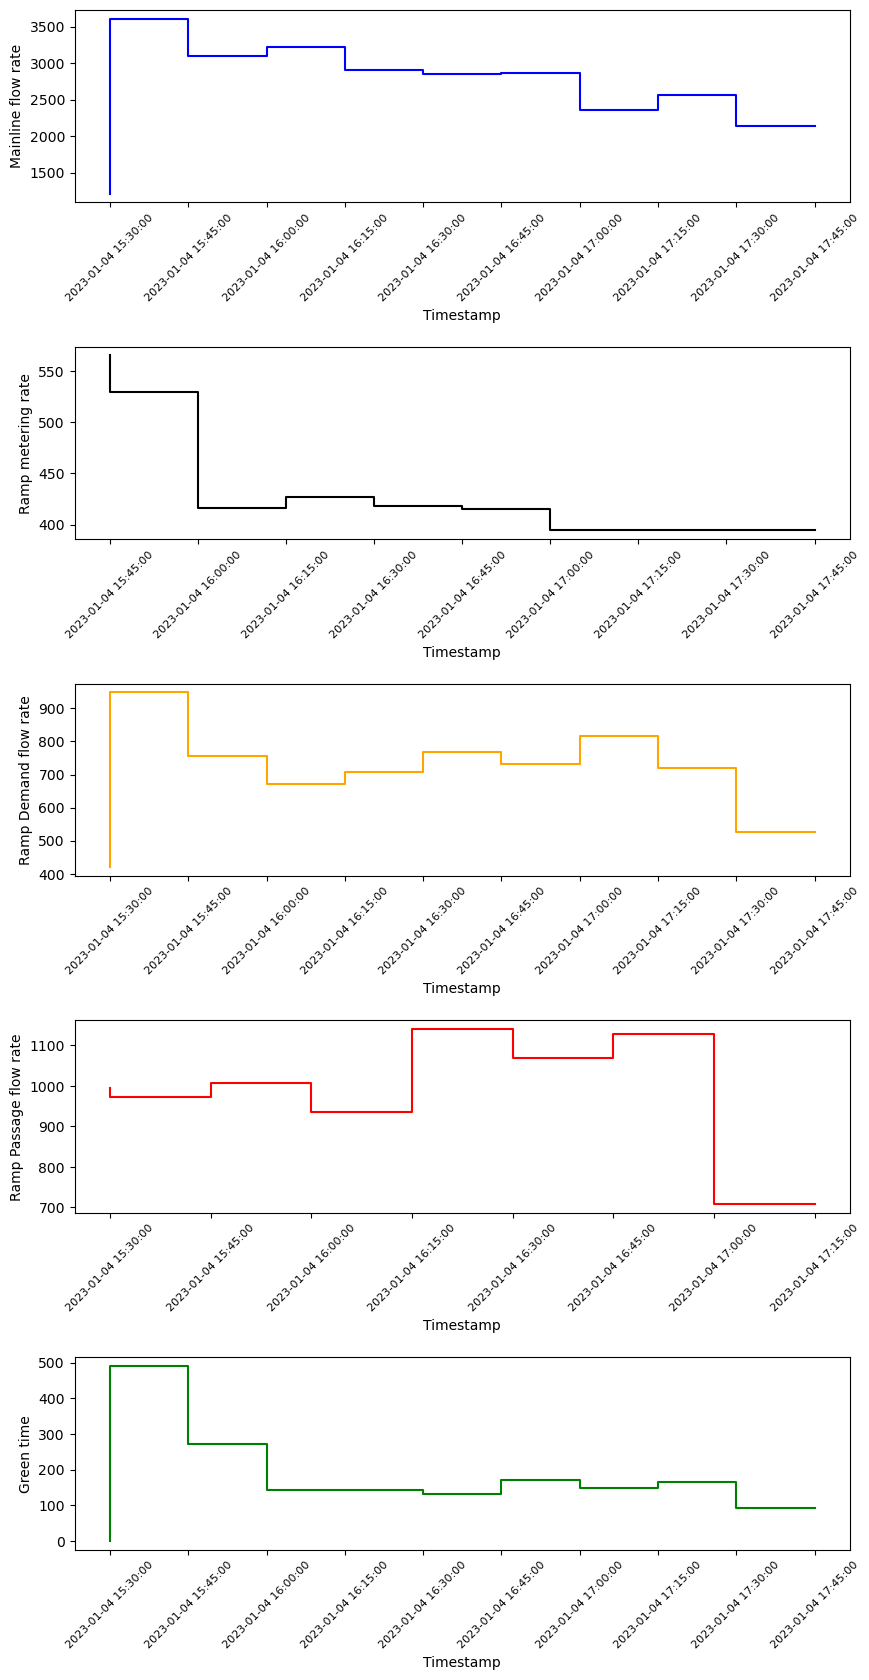

In [178]:
plot_function(15)

************30 Minute Aggregate********


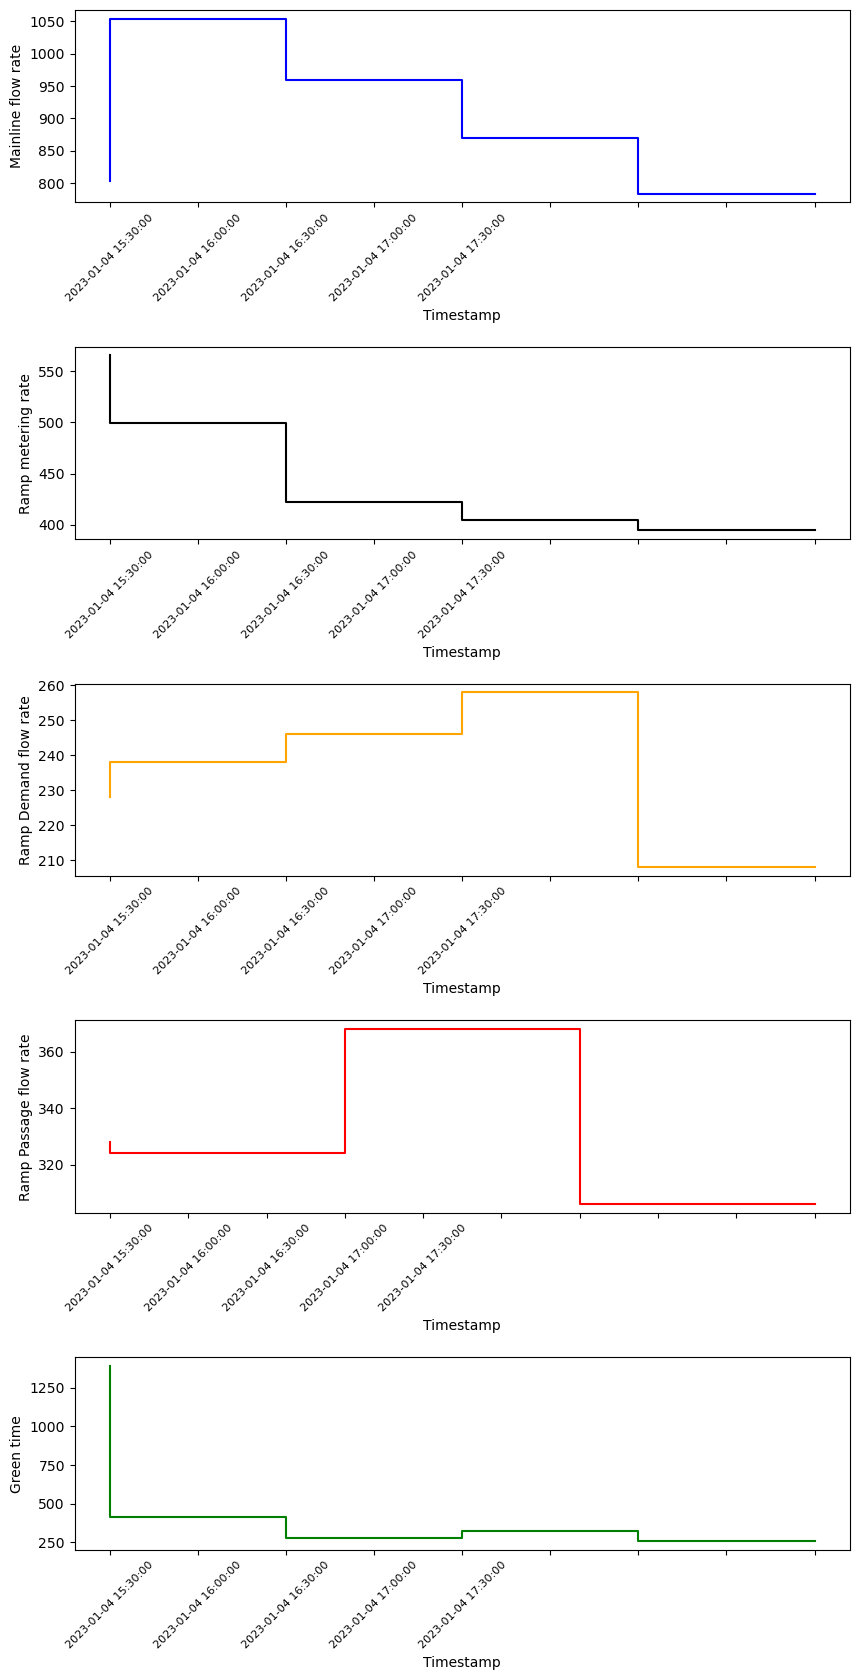

In [189]:
plot_function(30)

In [190]:
df_gr4

,Timestamp,Type,Aggregate Ramp Demand num vehicles,Aggregate Ramp Demand flow rate
0,2023-01-04 15:40:00,Detector On,35,420.0
1,2023-01-04 15:45:00,Detector On,25,300.0
2,2023-01-04 15:50:00,Detector On,30,360.0
3,2023-01-04 15:55:00,Detector On,24,288.0
4,2023-01-04 16:00:00,Detector On,19,228.0
5,2023-01-04 16:05:00,Detector On,25,300.0
6,2023-01-04 16:10:00,Detector On,19,228.0
7,2023-01-04 16:15:00,Detector On,20,240.0
8,2023-01-04 16:20:00,Detector On,18,216.0
9,2023-01-04 16:25:00,Detector On,18,216.0


            Timestamp         Type  Aggregate Ramp Demand num vehicles  \
0 2023-01-04 15:00:00  Detector On                                 114   
1 2023-01-04 16:00:00  Detector On                                 242   
2 2023-01-04 17:00:00  Detector On                                 233   

   Aggregate Ramp Demand flow rate  
0                            114.0  
1                            242.0  
2                            233.0  
            Timestamp         Type  Aggregate Ramp Passage num vehicles  \
0 2023-01-04 16:00:00  Detector On                                  326   
1 2023-01-04 17:00:00  Detector On                                  337   

   Aggregate Ramp Passage flow rate  
0                             326.0  
1                             337.0  
************60 Minute Aggregate********


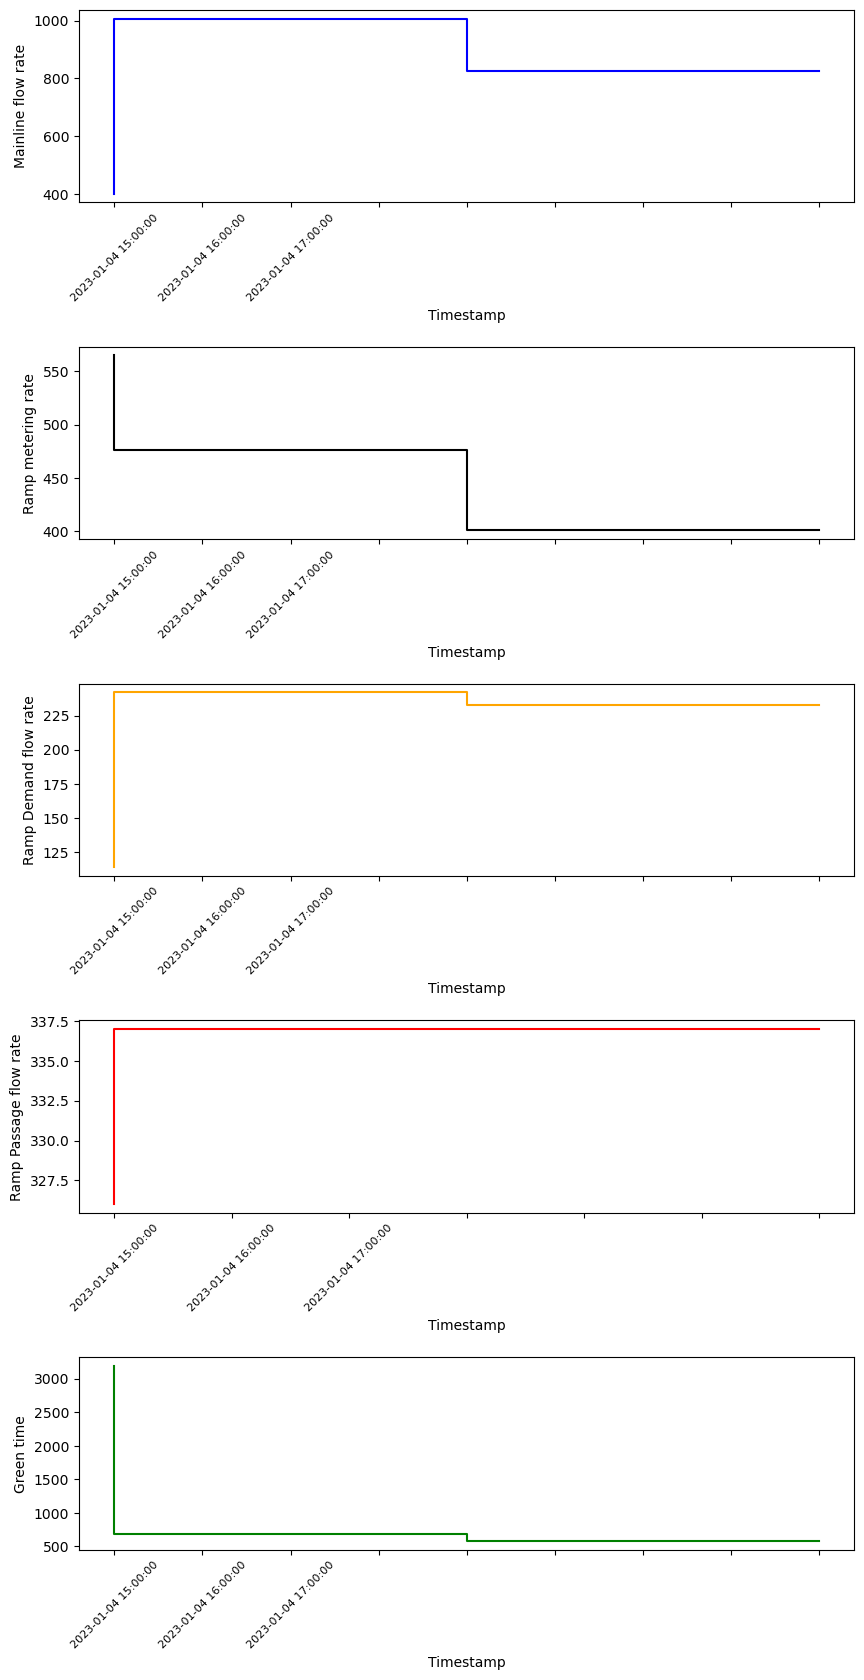

In [197]:
plot_function(60)

************60 Minute Aggregate********


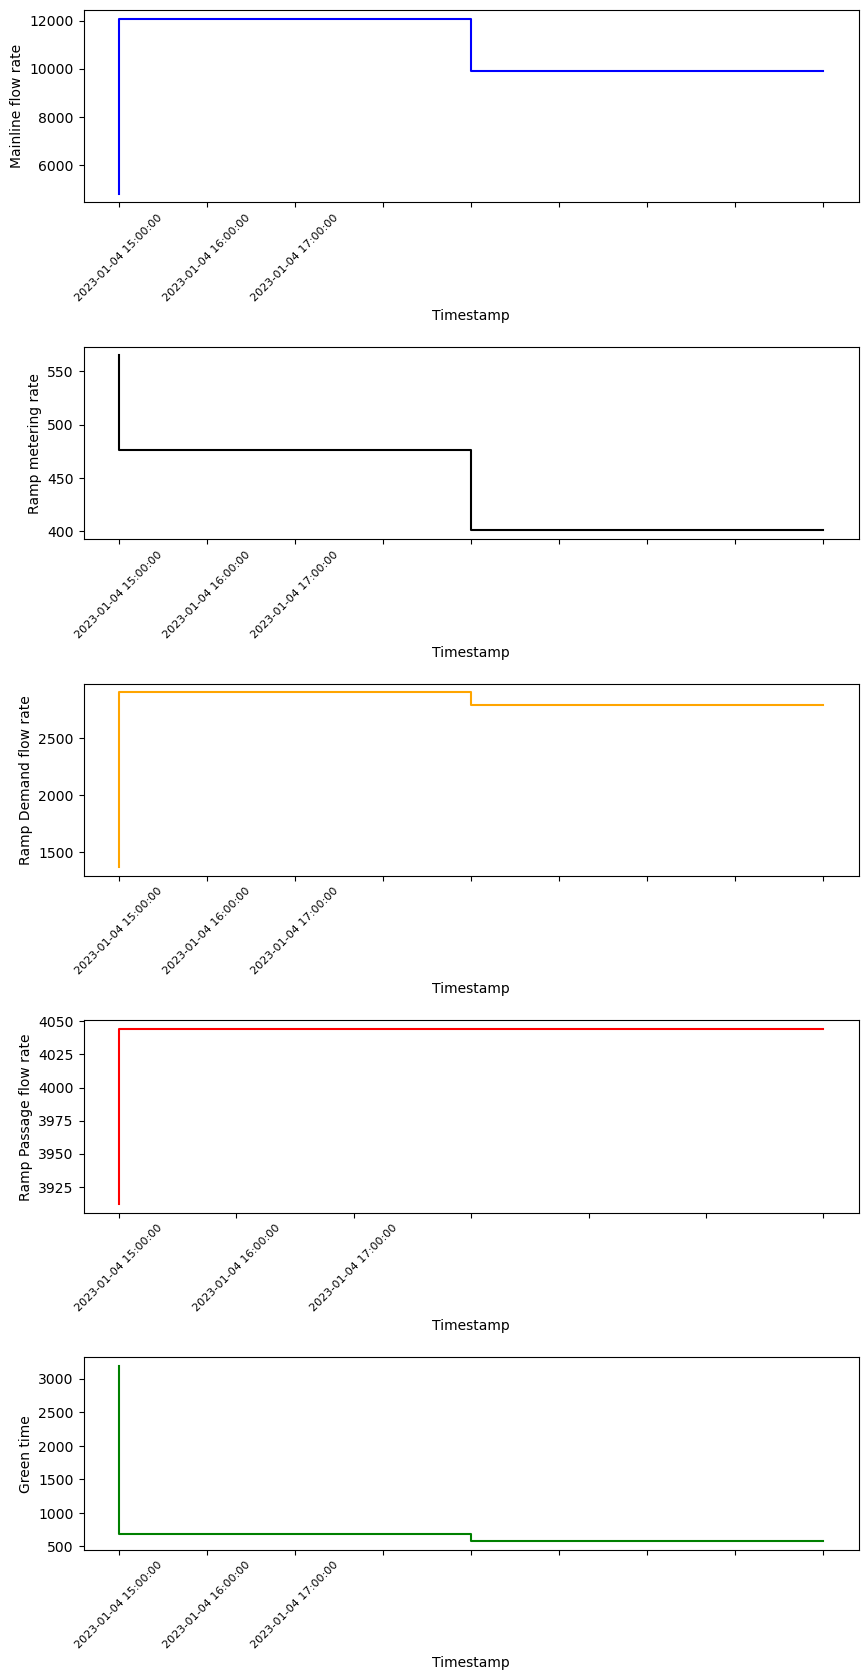

In [181]:
plot_function(60)